In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Flatten, Dense, Reshape
from keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
import time
import random

Train data shape:	 (60000, 28, 28) 
Test data shape:	 (10000, 28, 28)


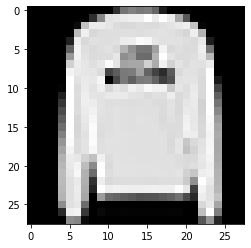

In [4]:
(xTrain, yTrain), (xTest, yTest) = tf.keras.datasets.fashion_mnist.load_data()
print("Train data shape:\t", xTrain.shape, "\nTest data shape:\t", xTest.shape)
plt.imshow(xTrain[random.randint(0, xTrain.shape[0])], cmap='gray')

# Parameters

In [5]:
epochs = 16
batchSize = 32
learningRate = 0.001
decay = 1e-6

# Preprocessing 
dividing all images by 255

In [6]:
xTrain = xTrain / 255.0
xTest = xTest / 255.0

# Building model

In [7]:
# Encoder
encoderInput = Input(shape=(28, 28, 1))         # 784 features
x = Flatten()(encoderInput)
x = Dense(128, activation='relu')(x)            # 128 features
encoderOutput = Dense(64, activation='relu')(x) # 64 features
encoder = keras.Model(encoderInput, encoderOutput, name="encoder")     # encoder model

# Decoder
decoderInput = Dense(128, activation='relu')(encoderOutput)
x = Dense(28*28*1, activation='relu')(decoderInput)
decoderOutput = Reshape((28, 28, 1))(x)

# Autoencoder
autoencoder = keras.Model(encoderInput, decoderOutput, name="autoencoder")
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_3 (Dense)              (None, 784)               101136    
_________________________________________________________________
reshape (Reshape)            (None, 28, 28, 1)         

# Training model

In [8]:
optimizer = Adam(learningRate, decay)
autoencoder.compile(optimizer, loss="mse")
autoencoder.fit(xTrain, xTrain, epochs=epochs, batch_size=batchSize, validation_split=0.1)

Epoch 1/16
1688/1688 [==============================] - 8s 4ms/step - loss: 0.0465 - val_loss: 0.0260
Epoch 2/16
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0246 - val_loss: 0.0225
Epoch 3/16
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0214 - val_loss: 0.0193
Epoch 4/16
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0196 - val_loss: 0.0212
Epoch 5/16
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0184 - val_loss: 0.0184
Epoch 6/16
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0177 - val_loss: 0.0178
Epoch 7/16
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0174 - val_loss: 0.0174
Epoch 8/16
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0172 - val_loss: 0.0193
Epoch 9/16
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0171 - val_loss: 0.0165
Epoch 10/16
1688/1688 [==============================] - 7s 4ms/step - loss: 0.016

# Testing model

In [54]:
def testModel(image):
  figure = plt.figure(figsize=(28, 28))
  rows, columns = 1, 2

  figure.add_subplot(rows, columns, 1)
  plt.imshow(image, cmap="gray")     # showing original image
  plt.axis('off') 
  plt.title("Original image", fontsize=40) 

  # Autoencoder output image
  image = image.reshape(-1, 28, 28, 1)
  predection = autoencoder.predict([image])
  #predection = predection * 255

  # Showing output image
  figure.add_subplot(rows, columns, 2)
  plt.imshow(predection[0].reshape(28, 28), cmap="gray")
  plt.axis('off') 
  plt.title("Generated image", fontsize=40) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


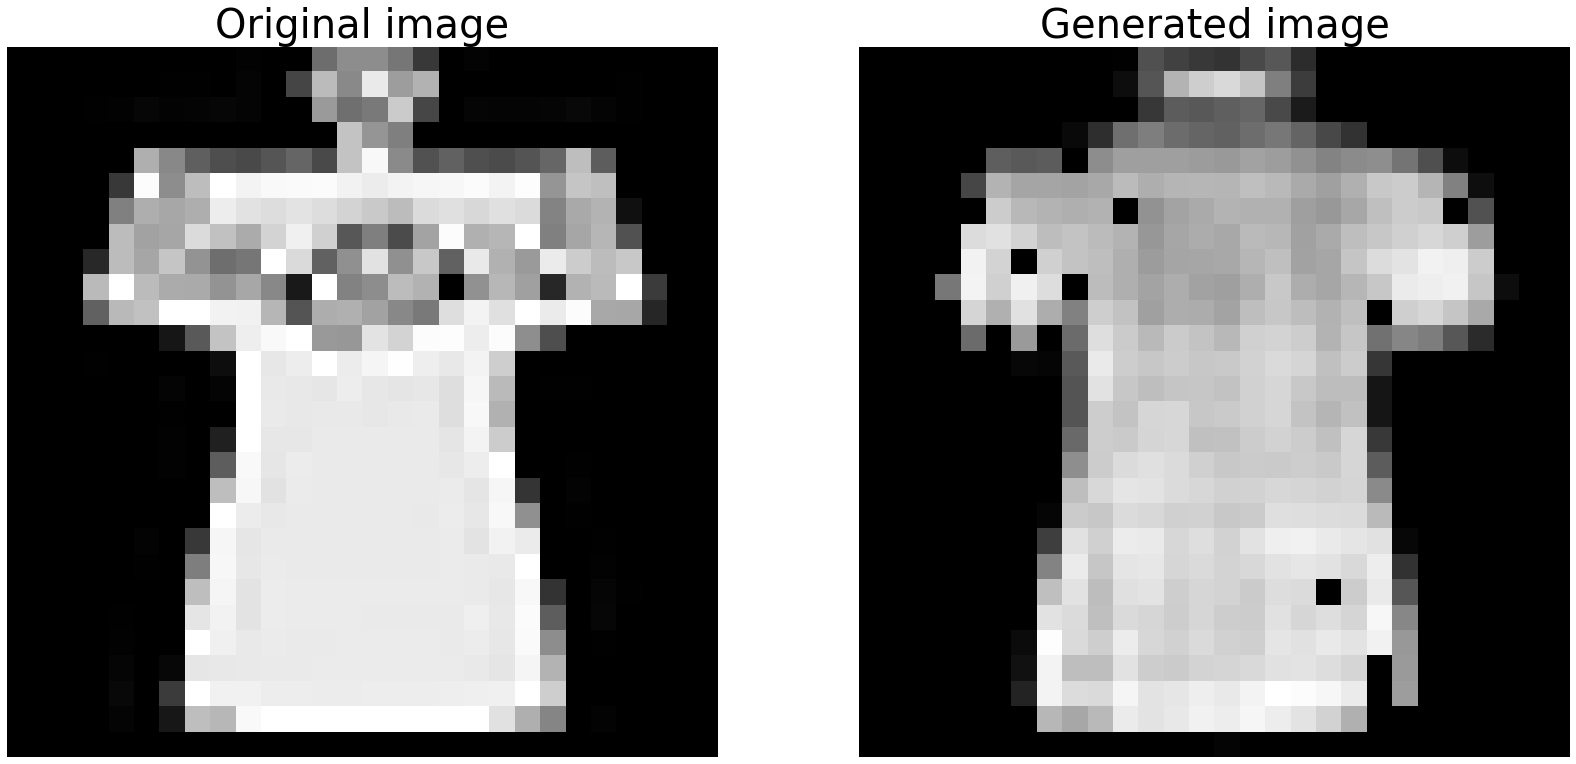

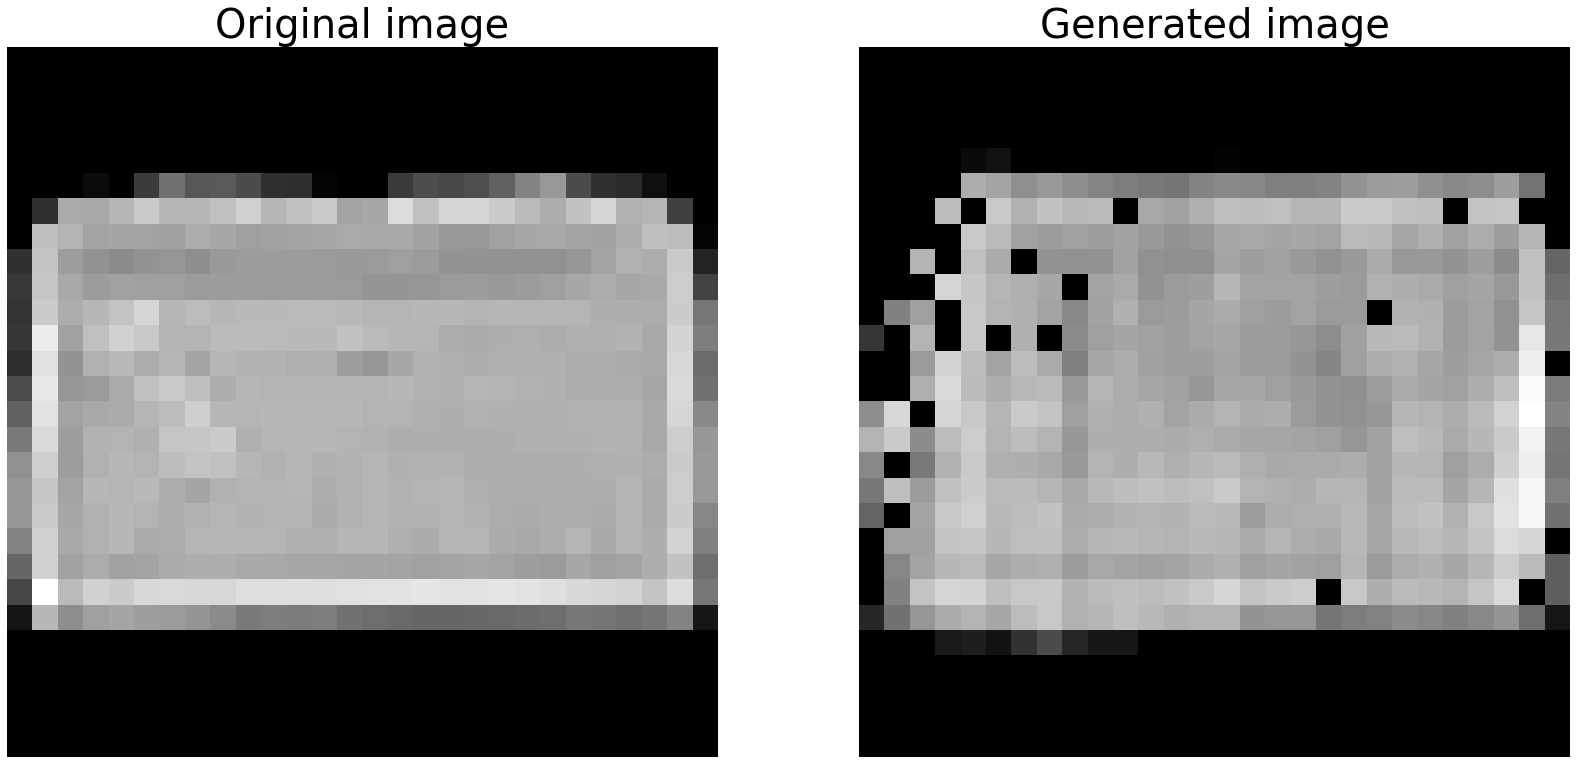

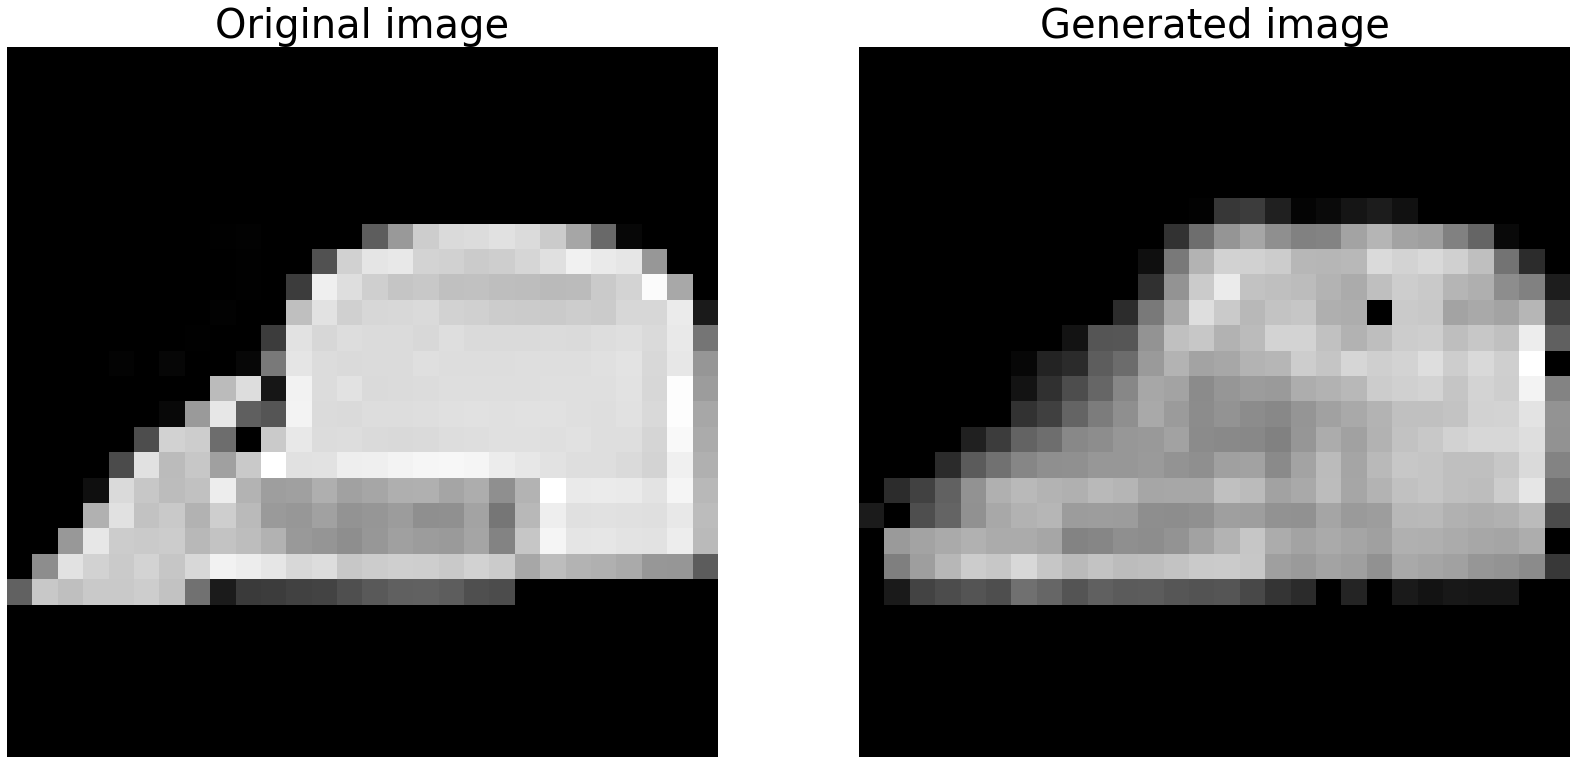

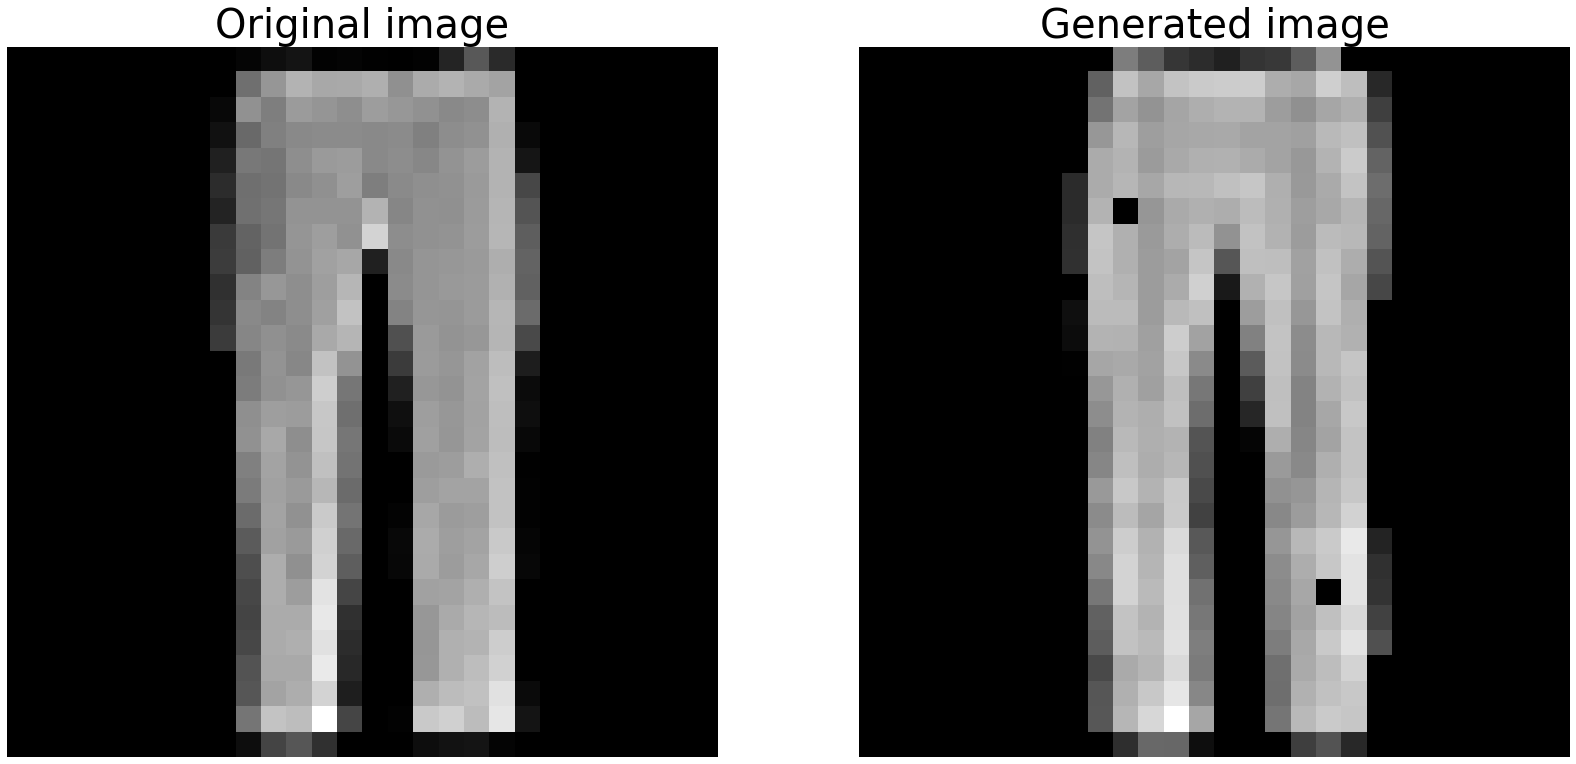

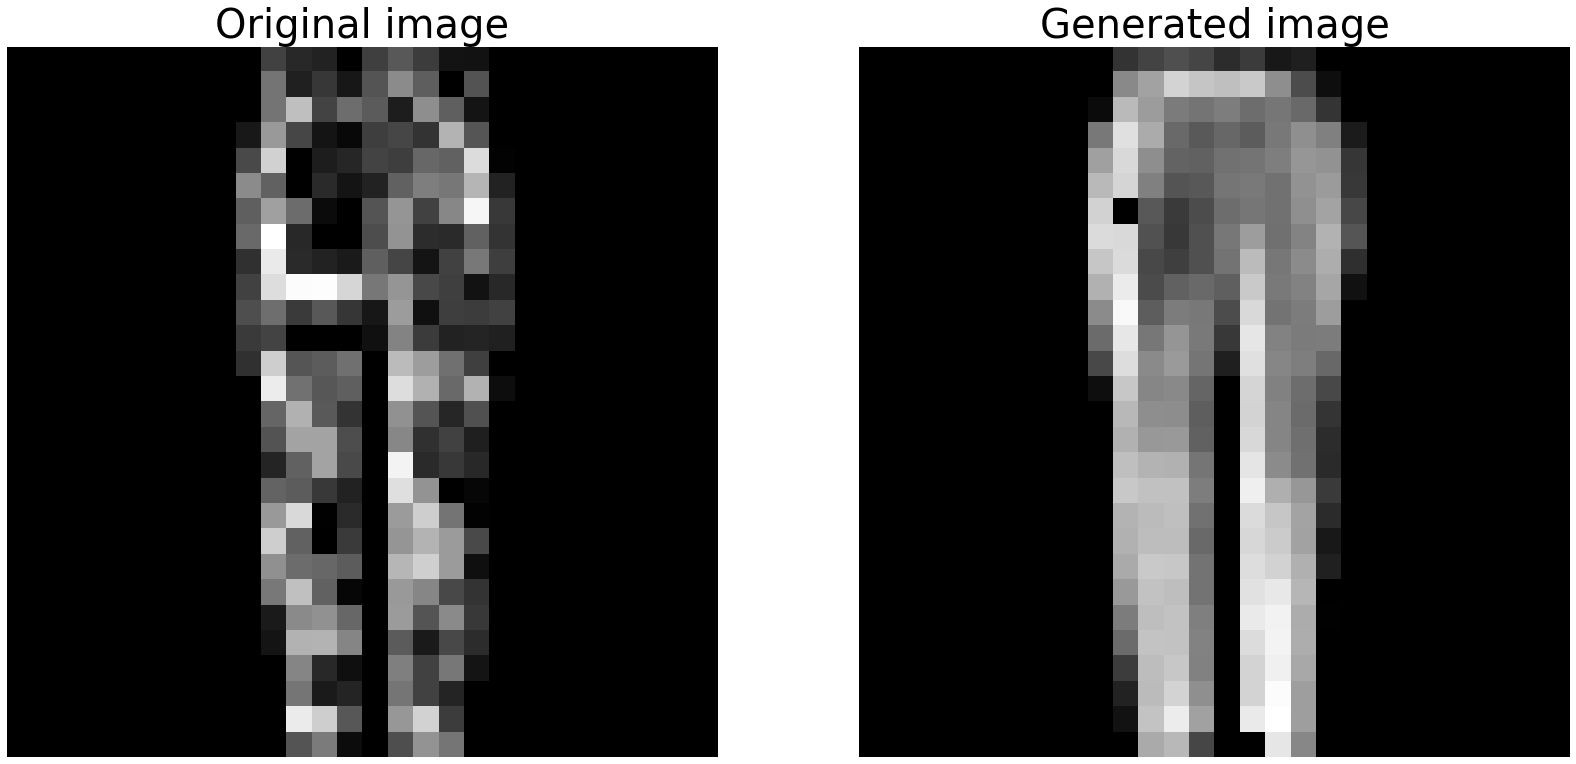

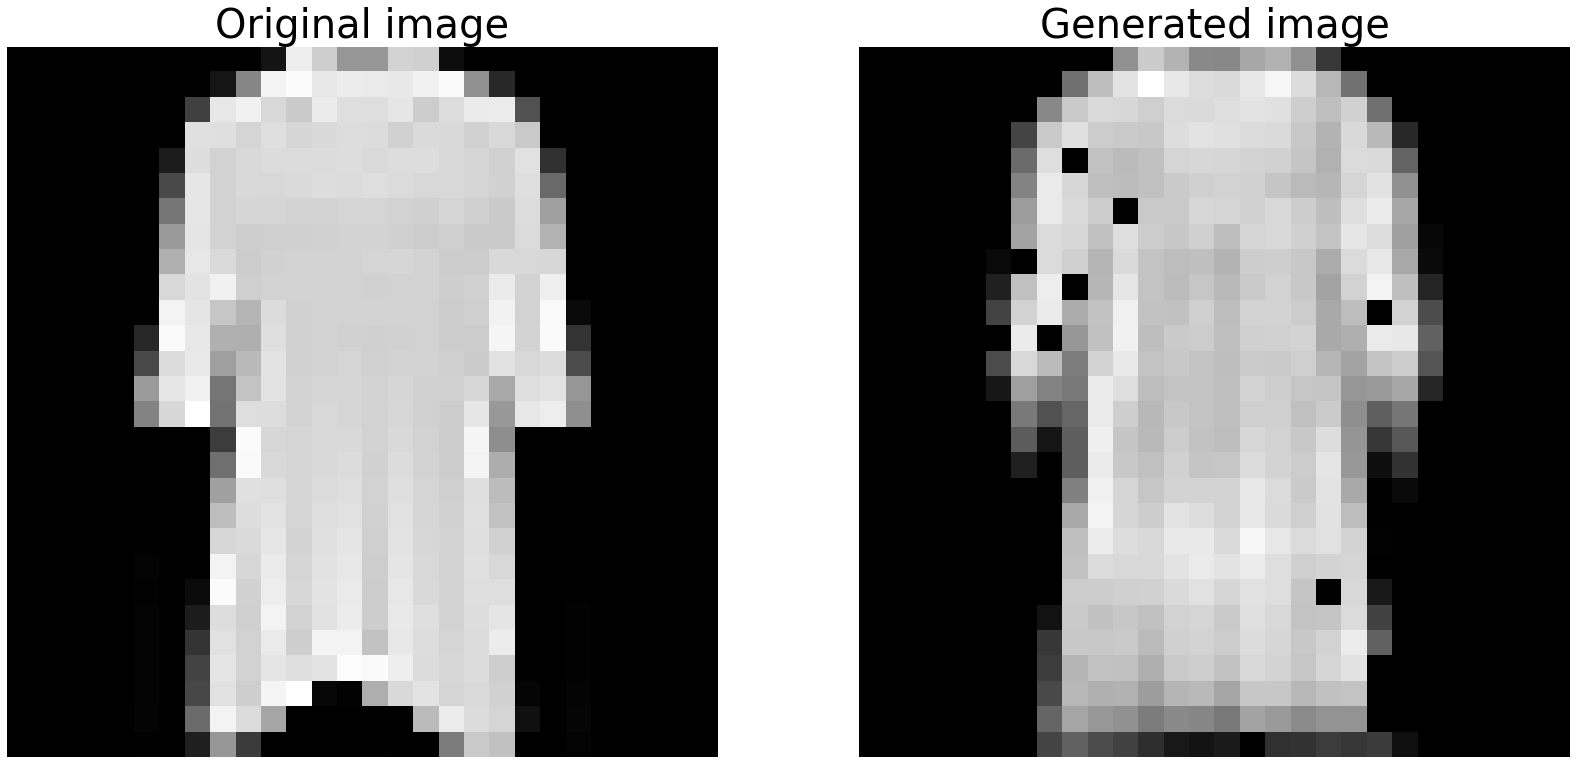

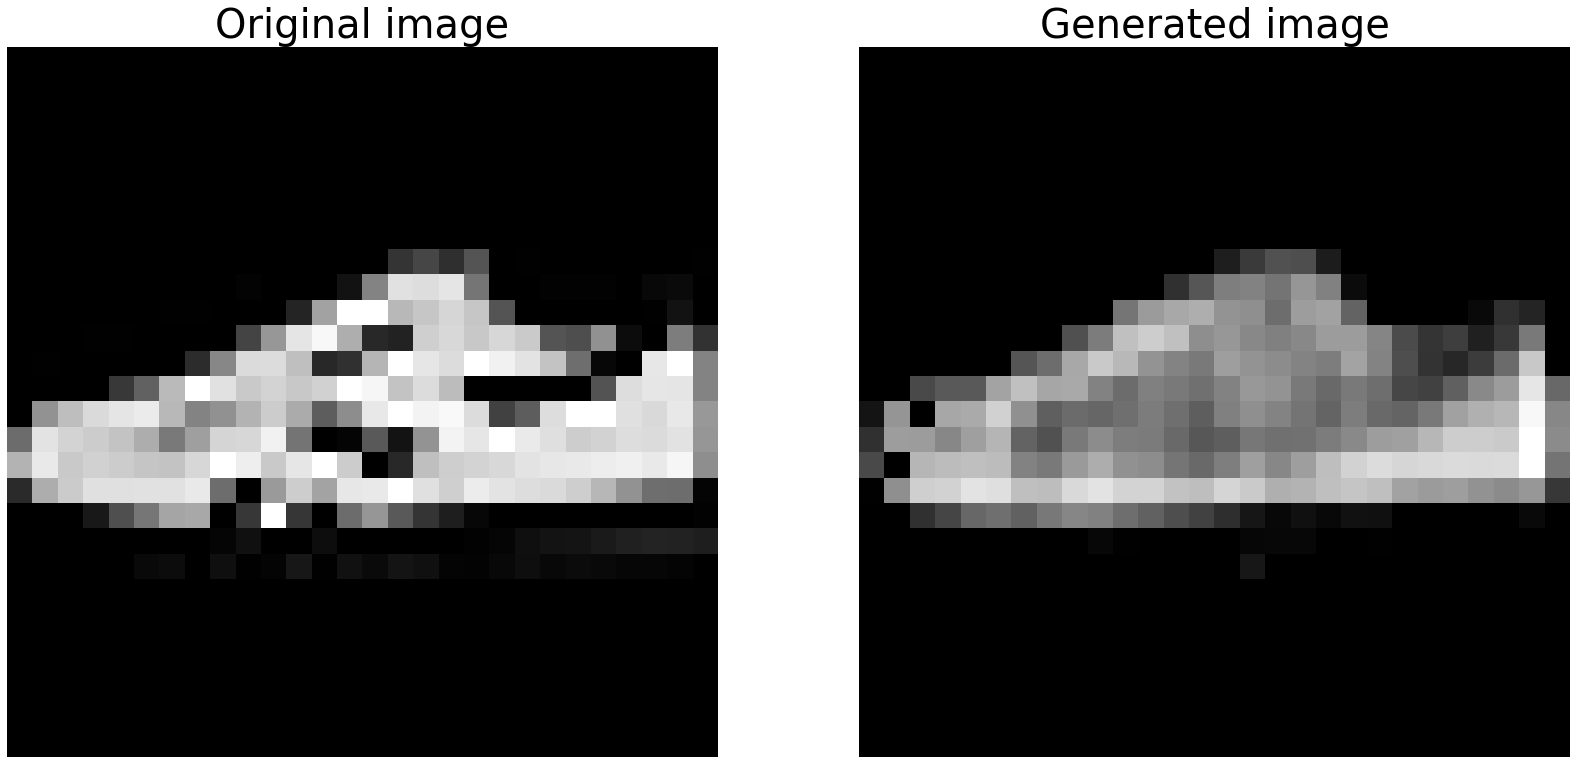

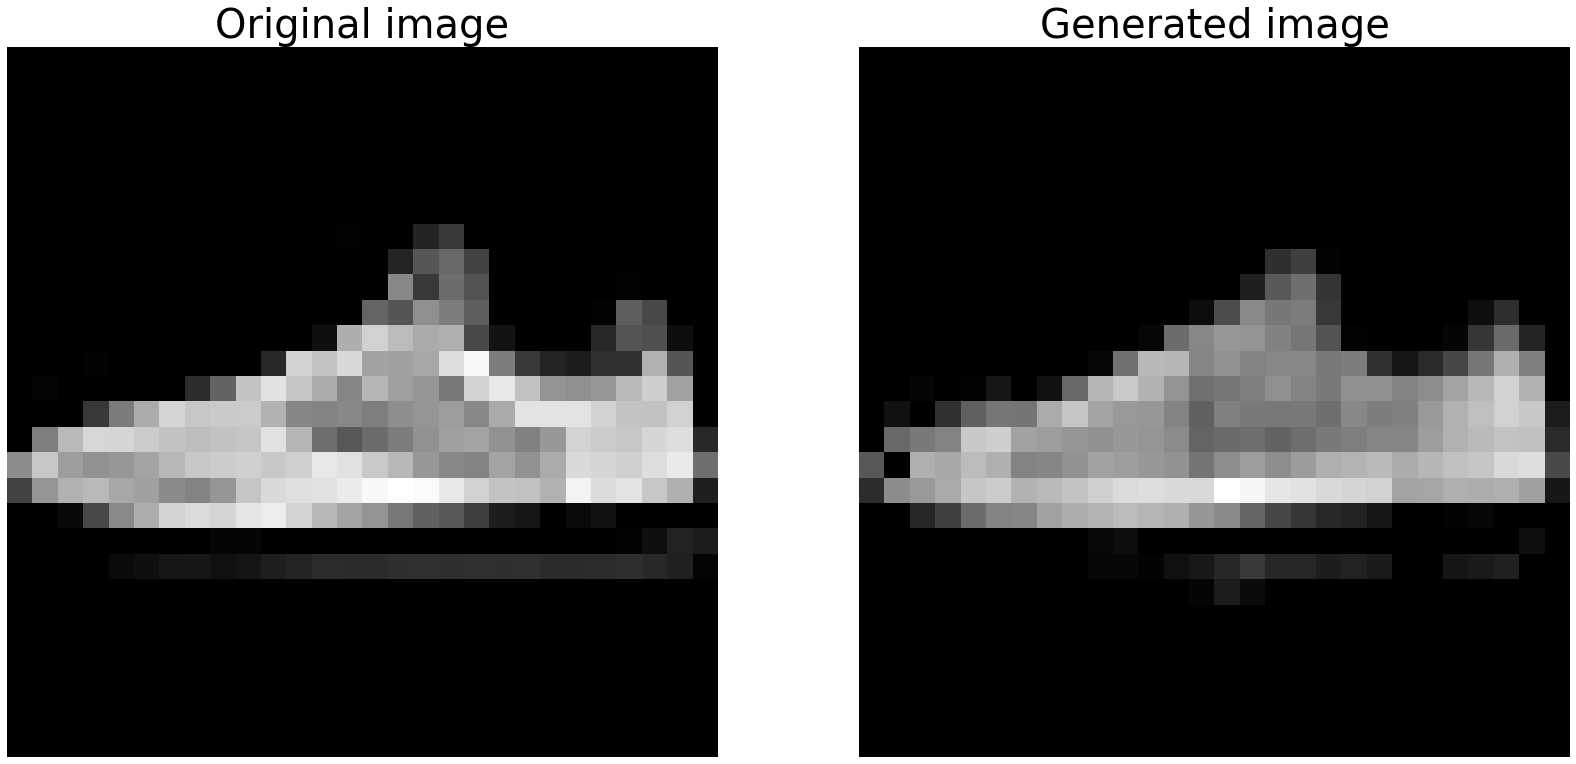

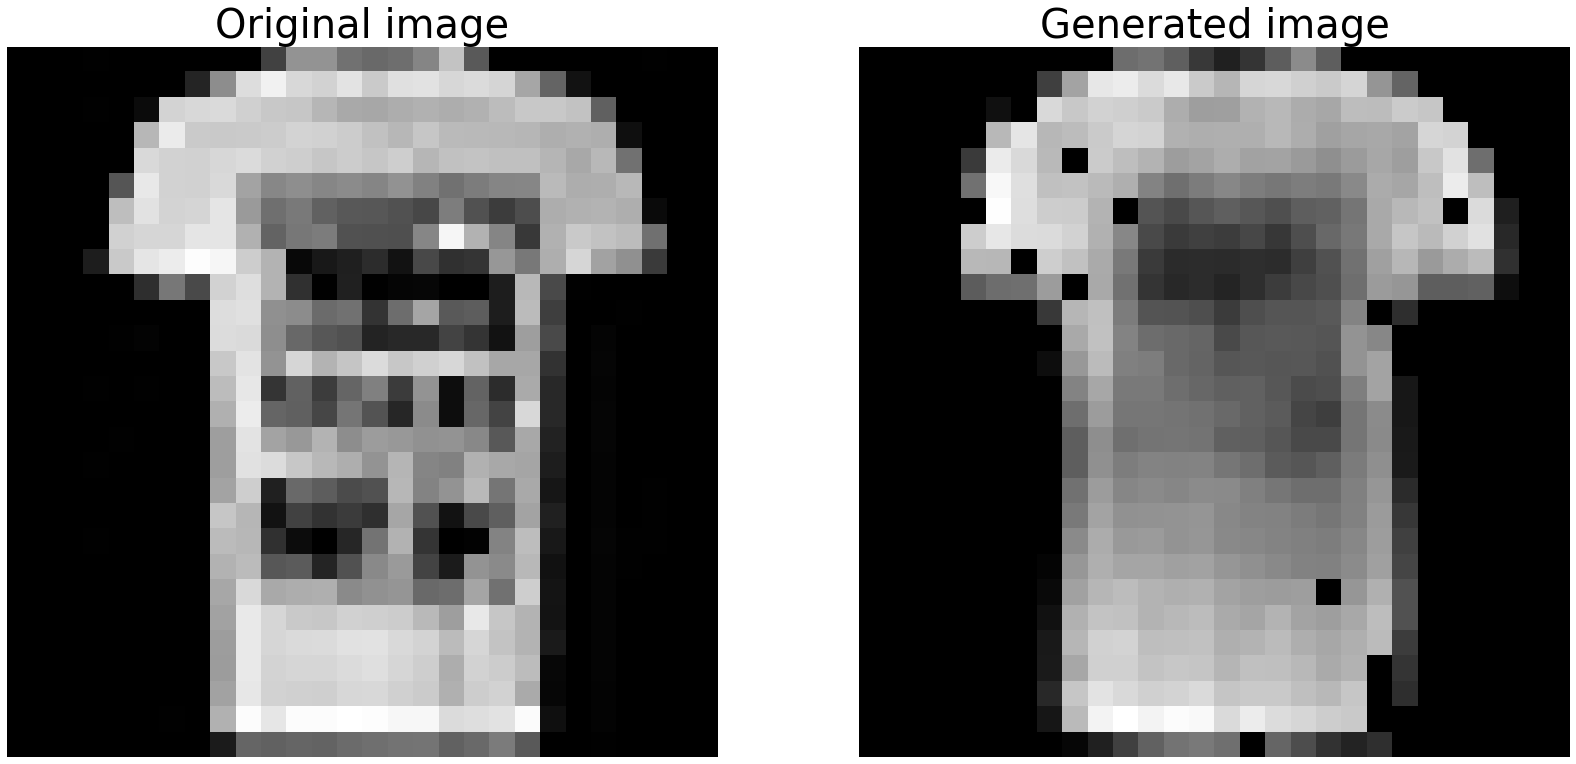

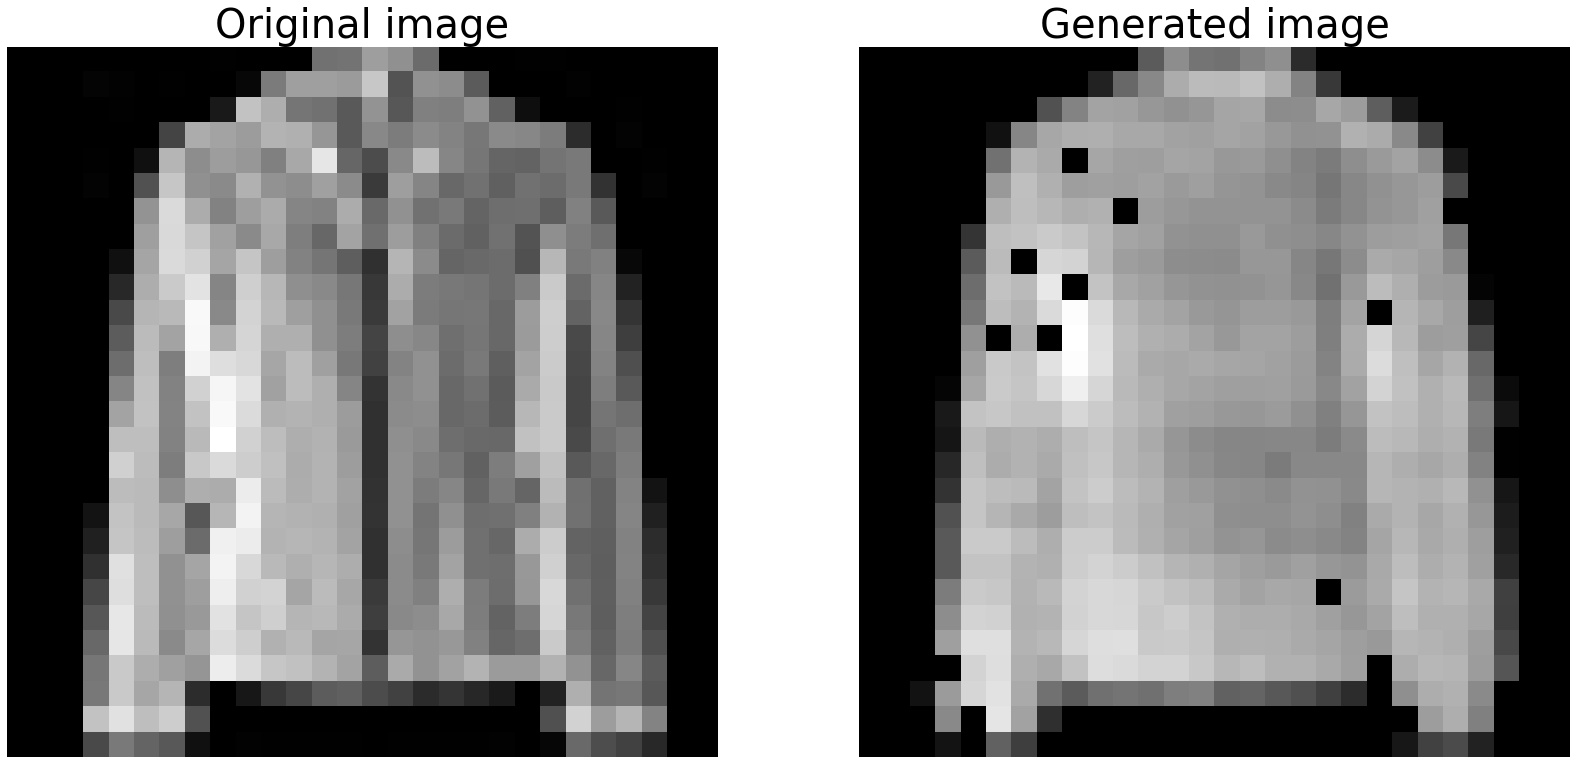

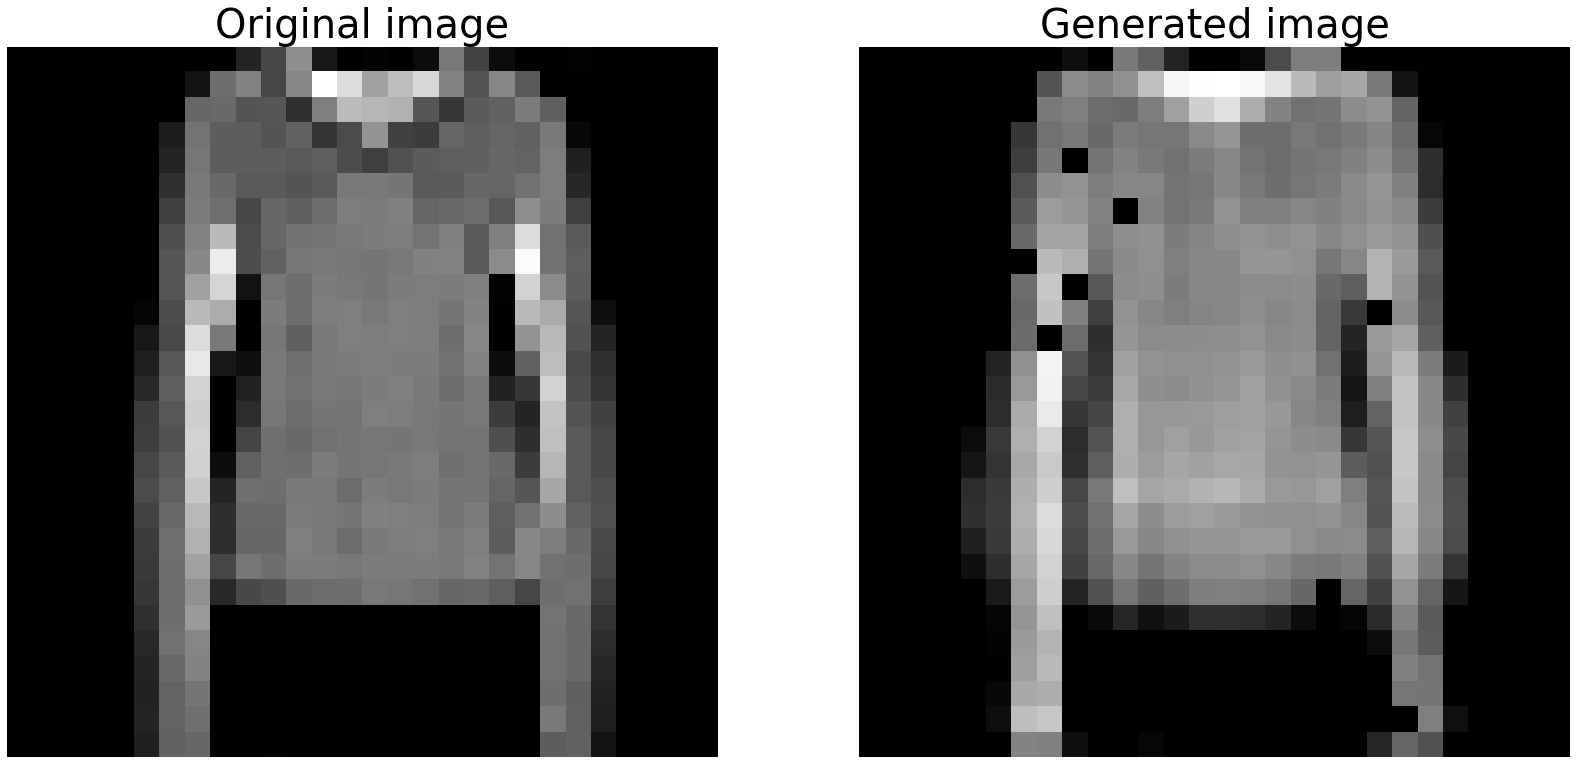

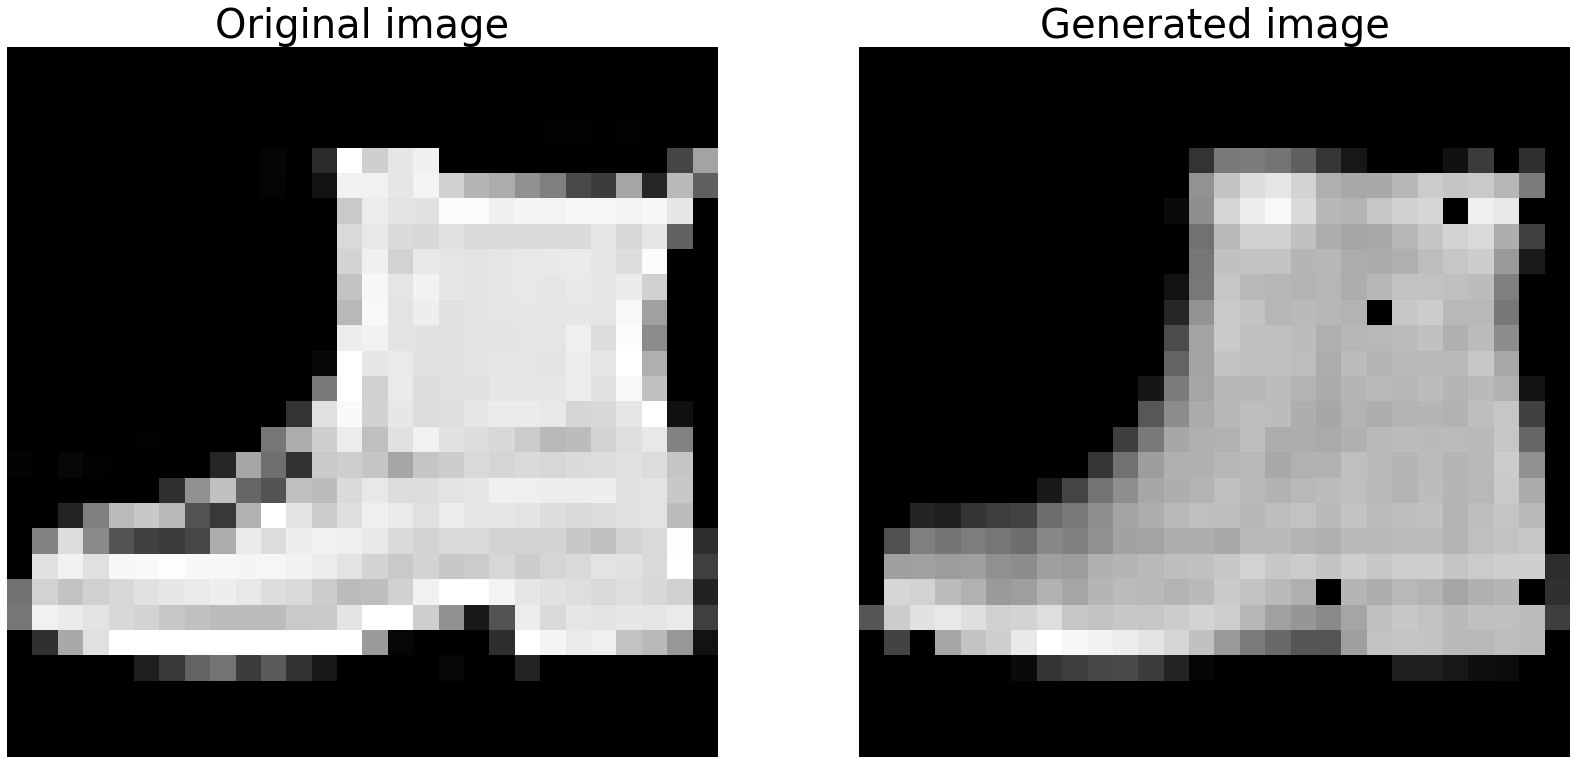

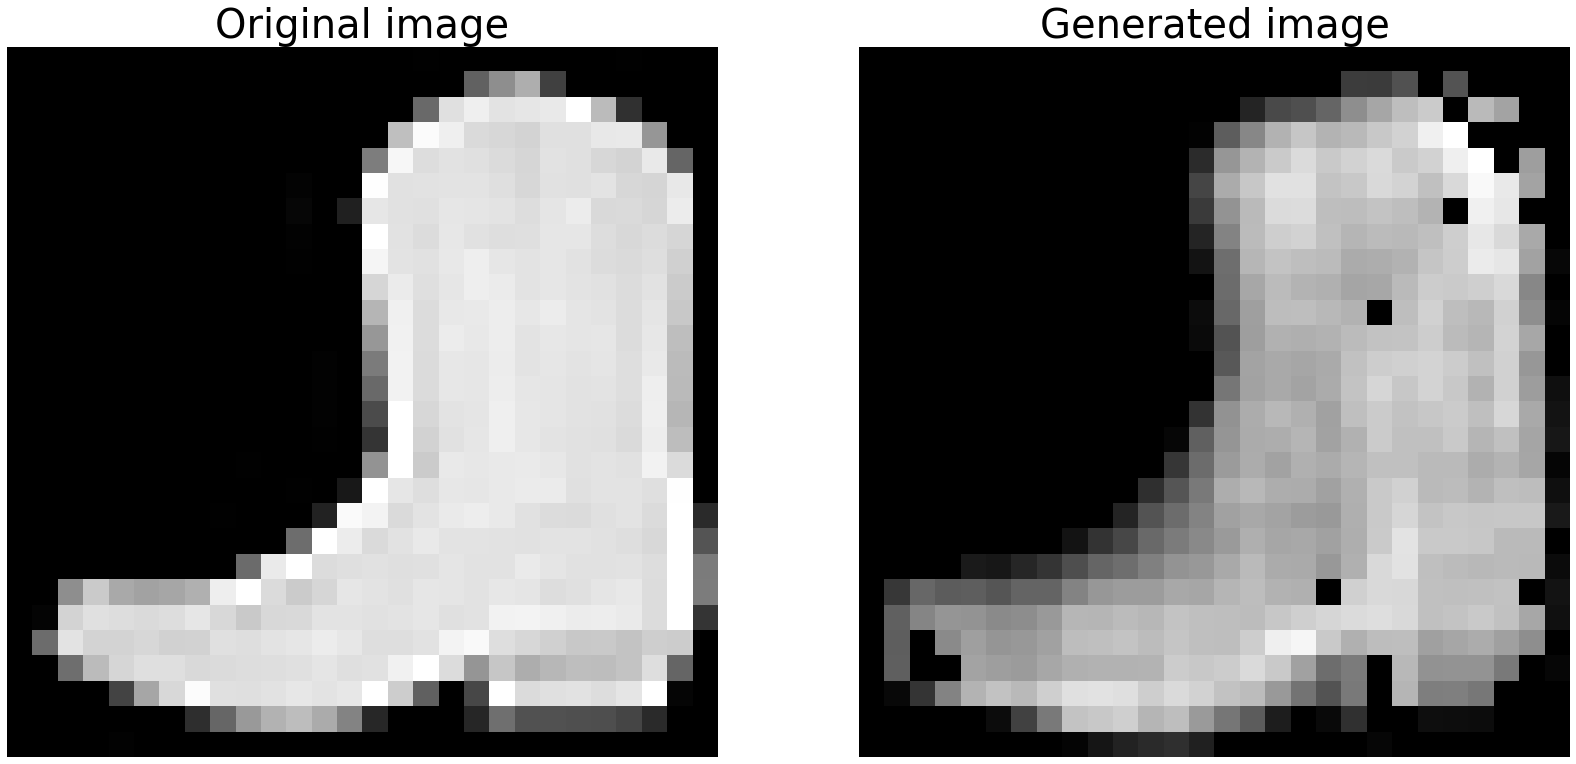

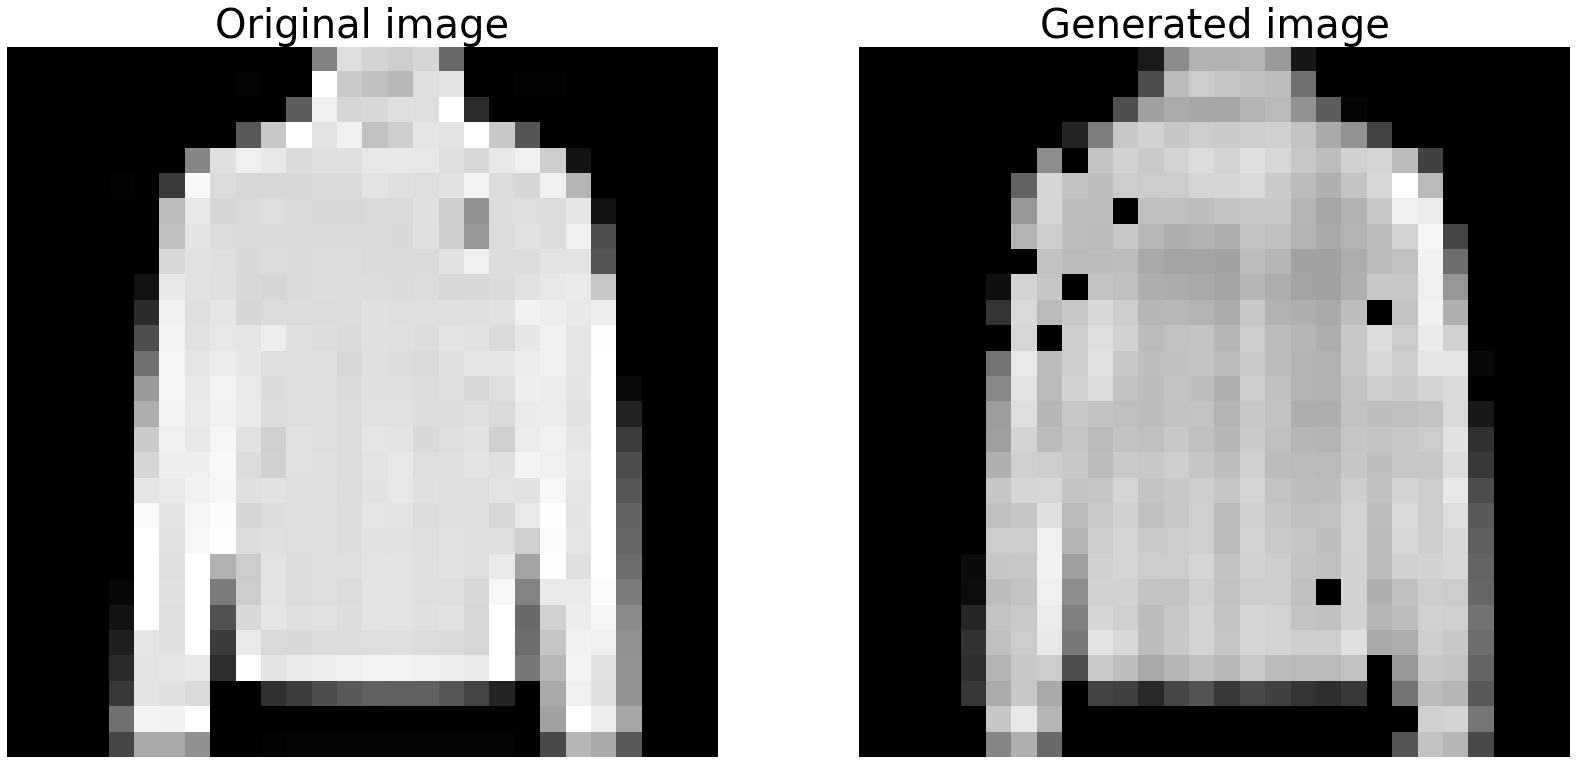

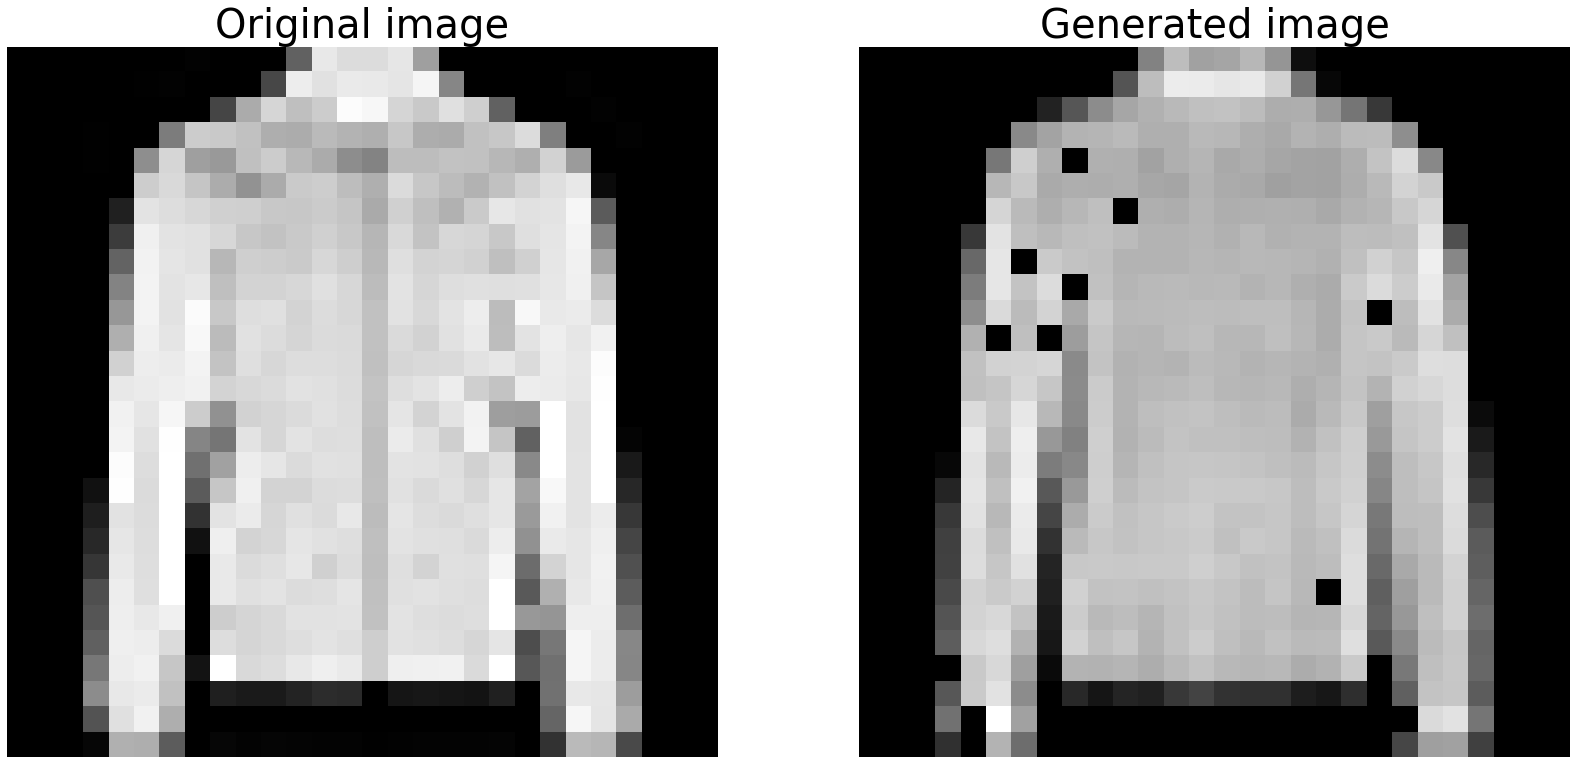

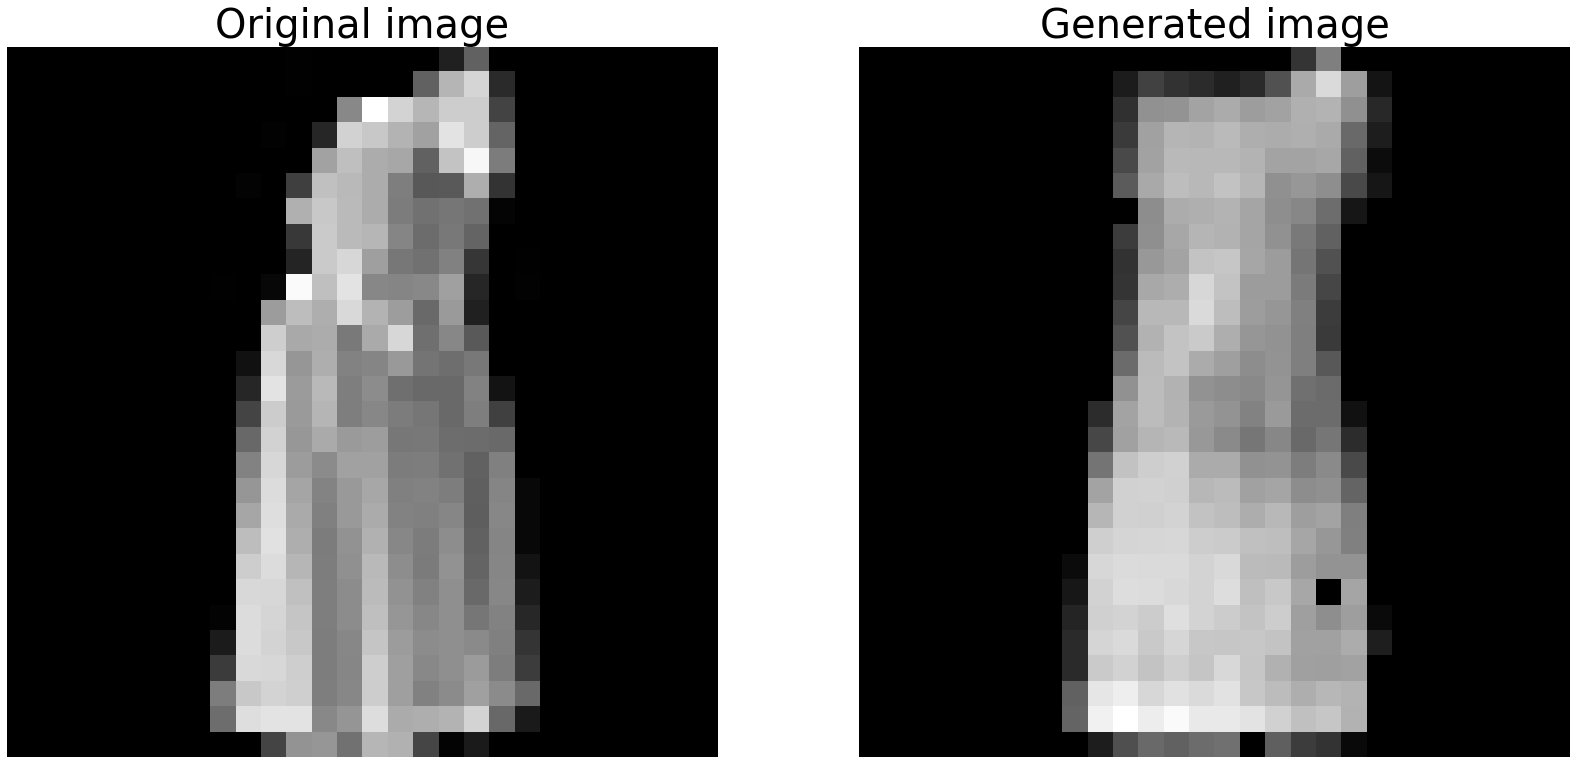

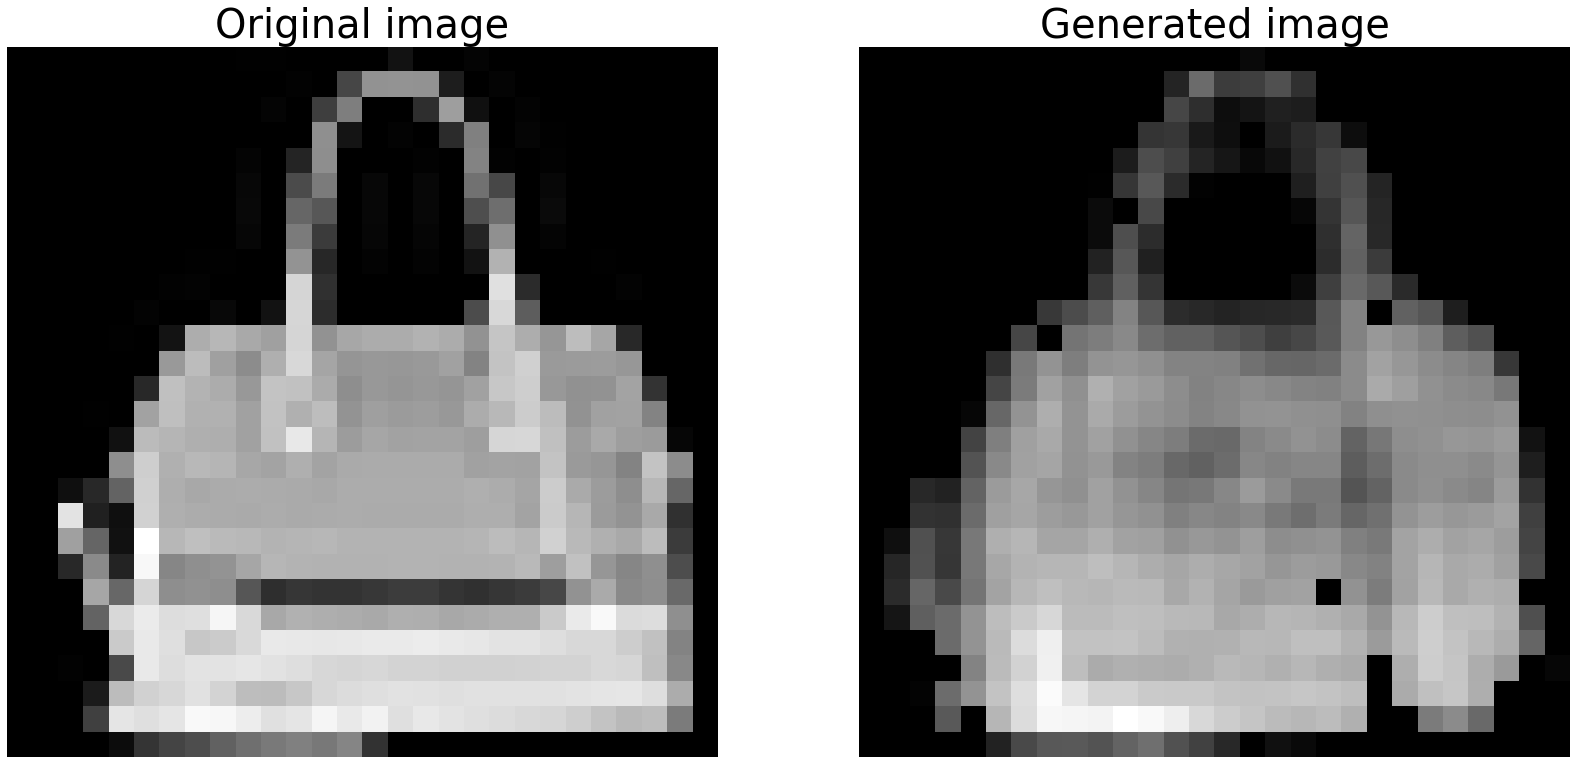

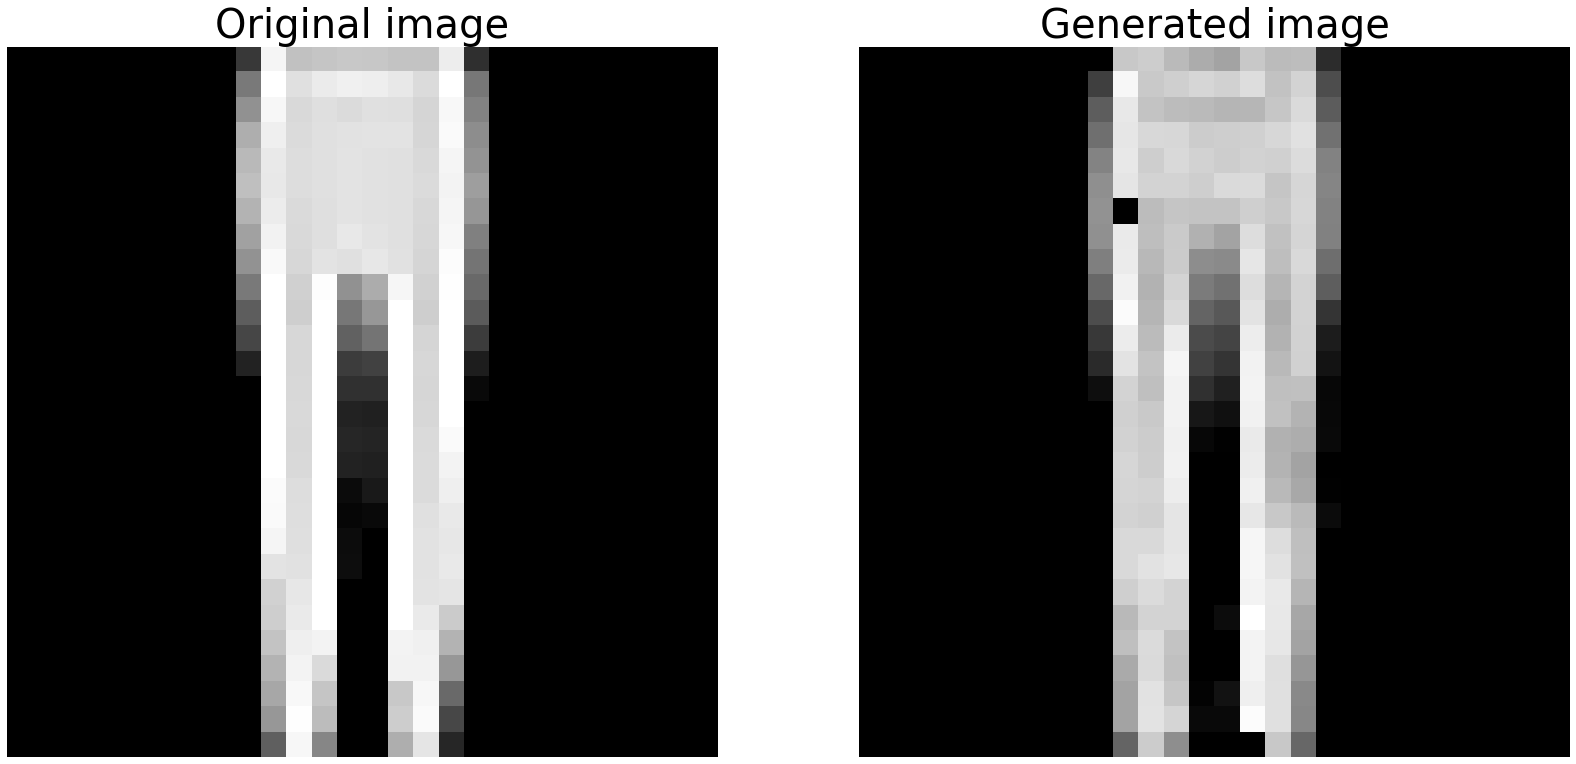

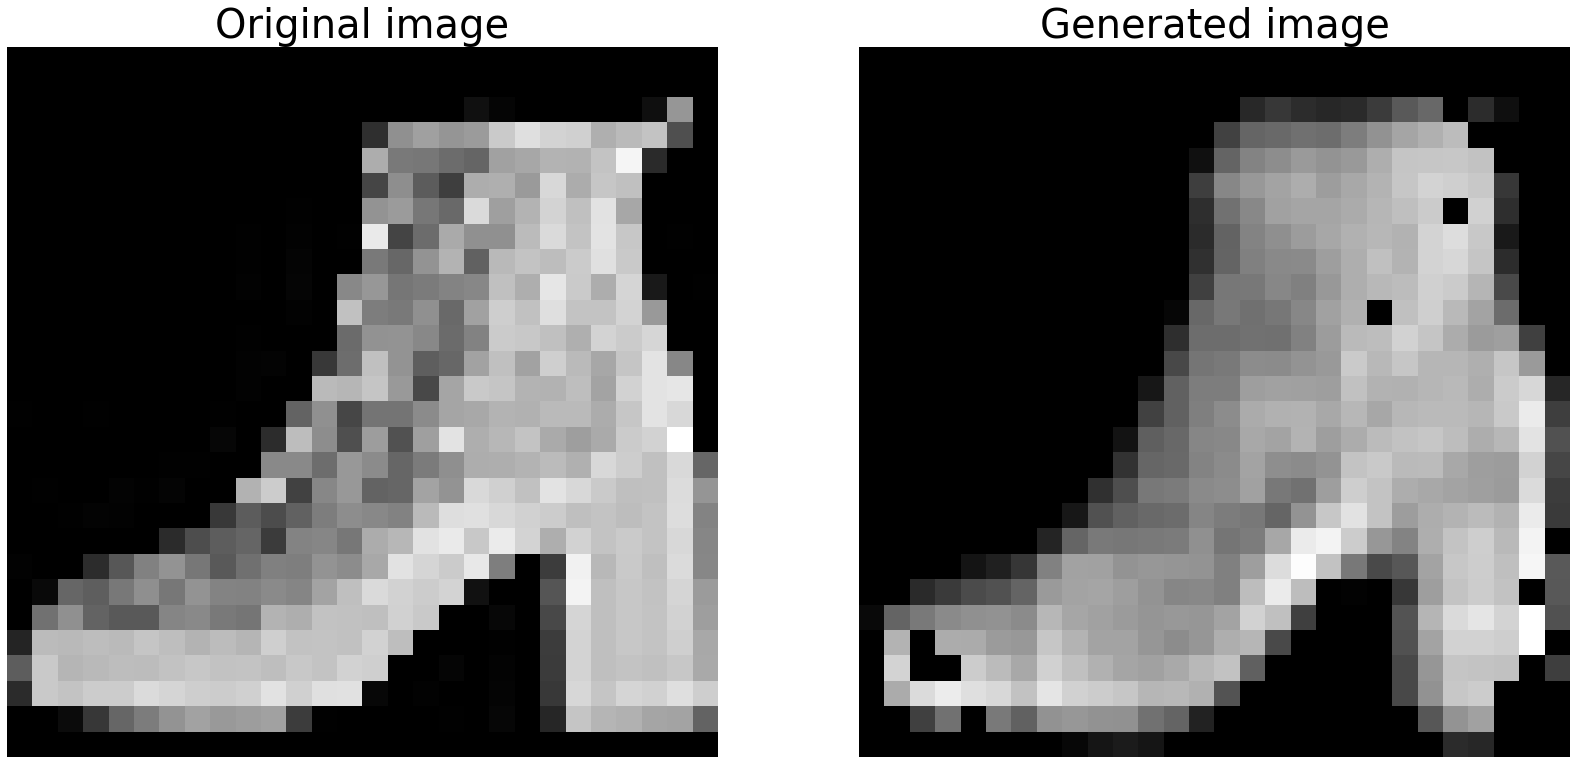

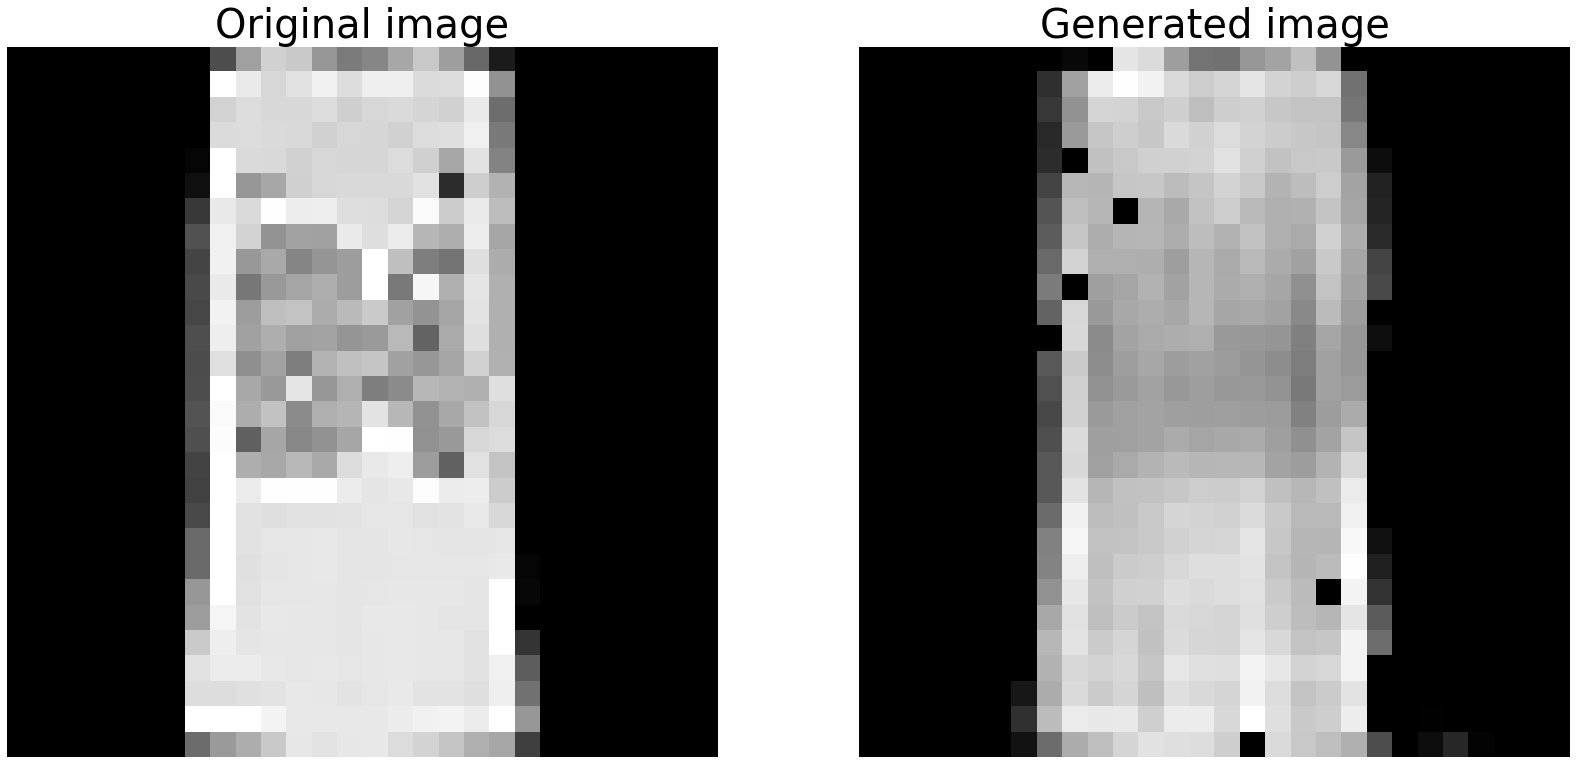

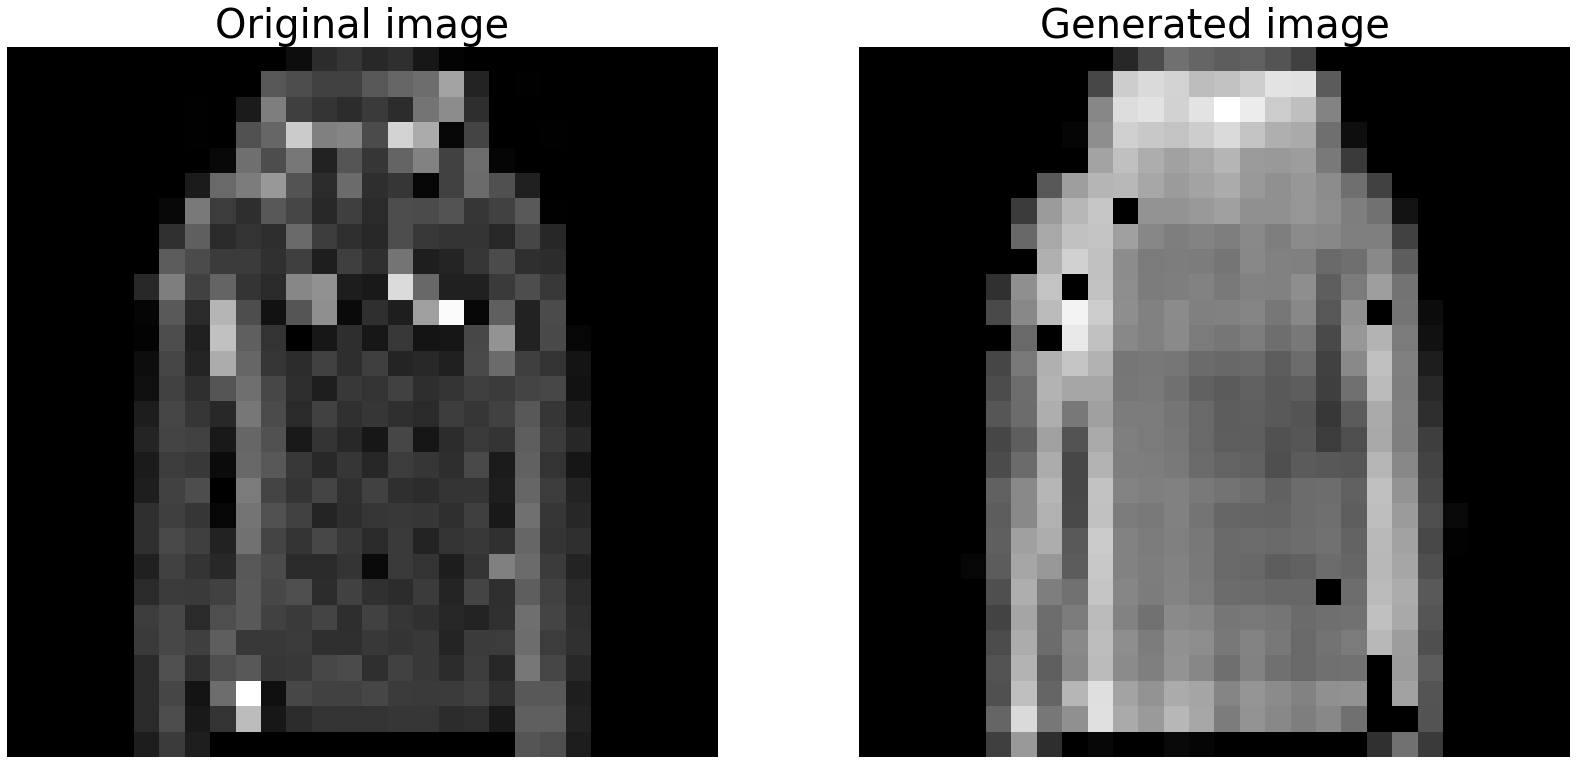

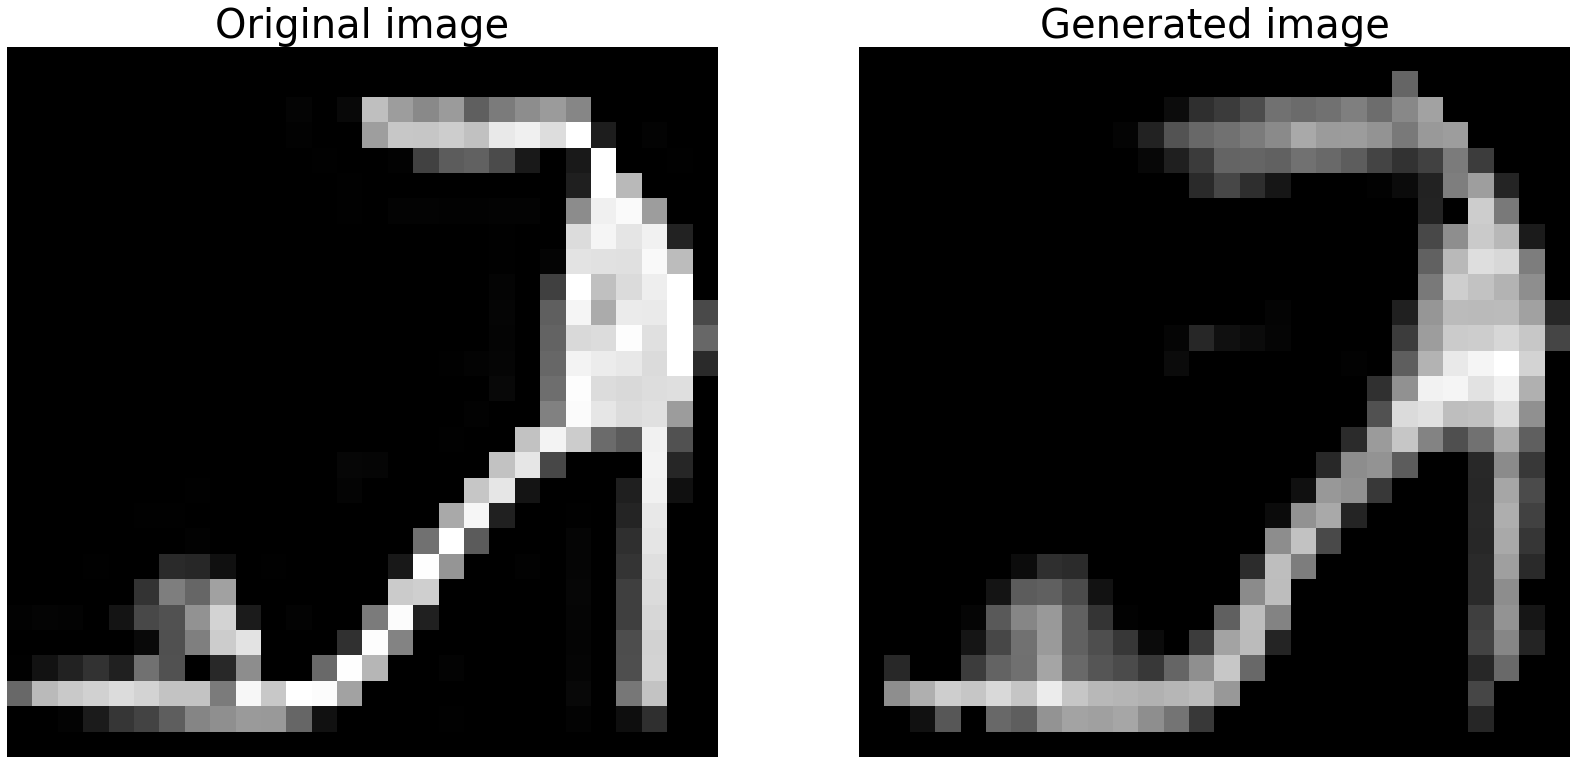

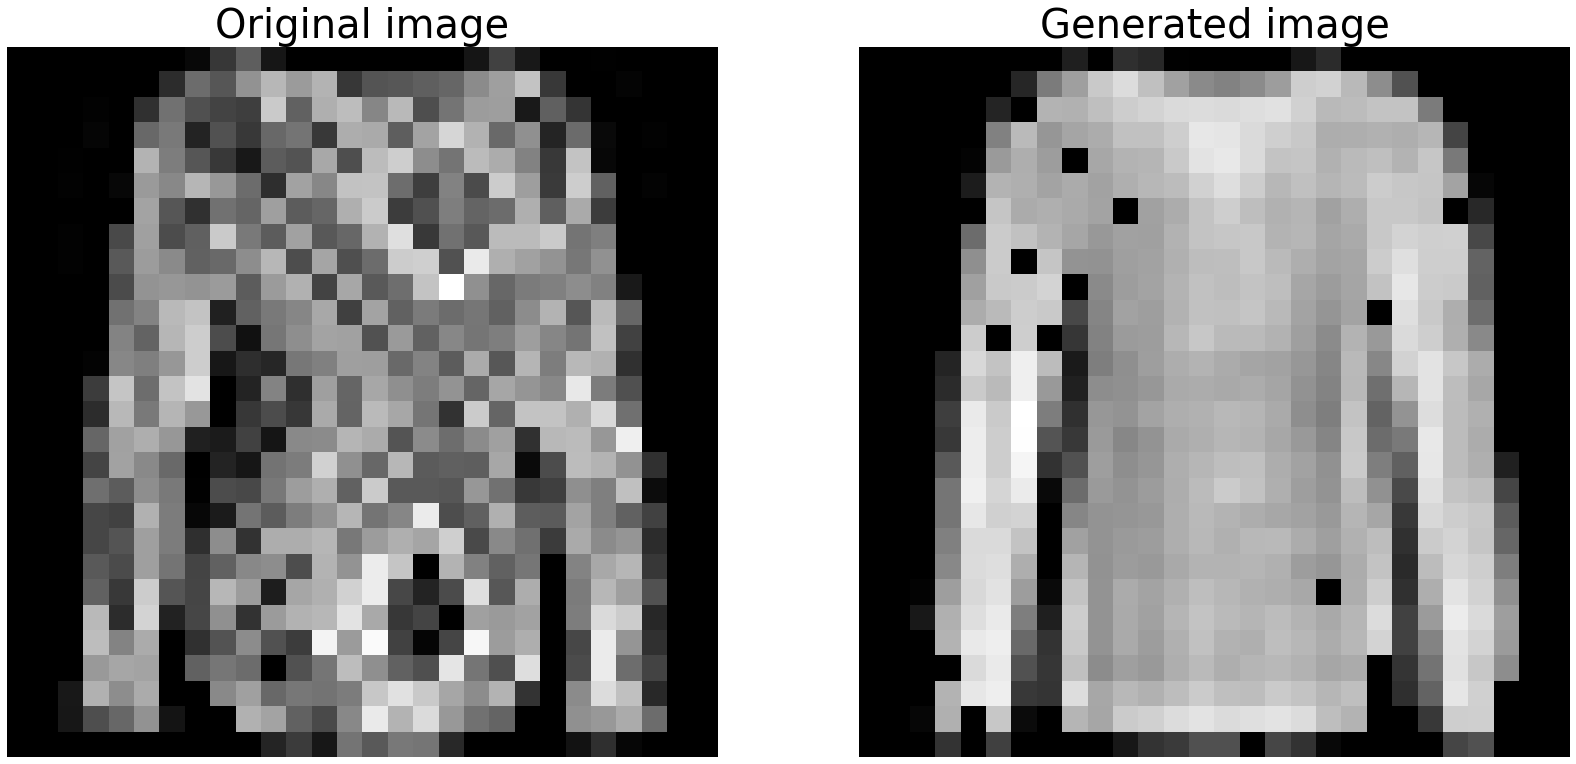

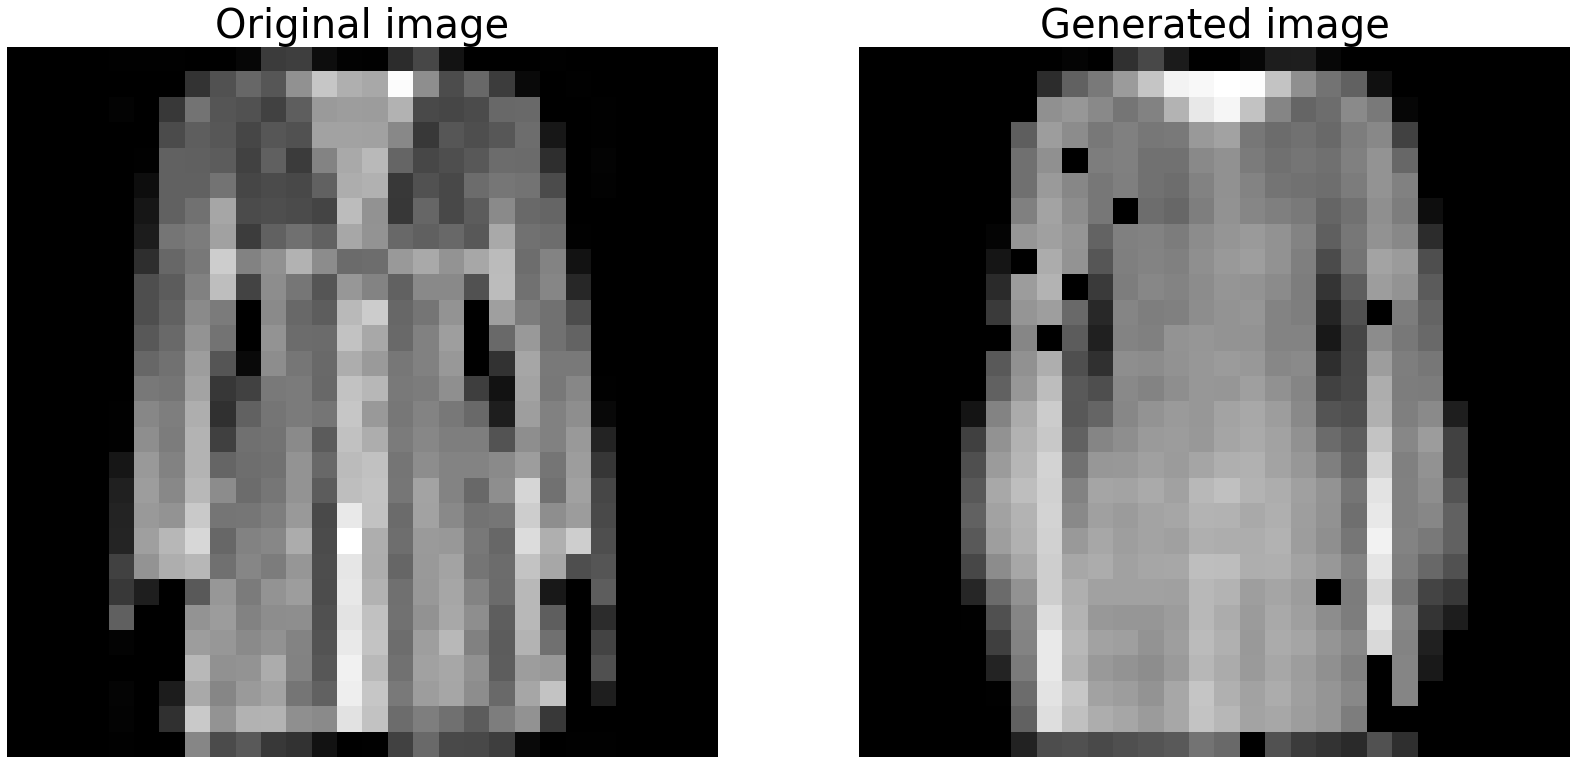

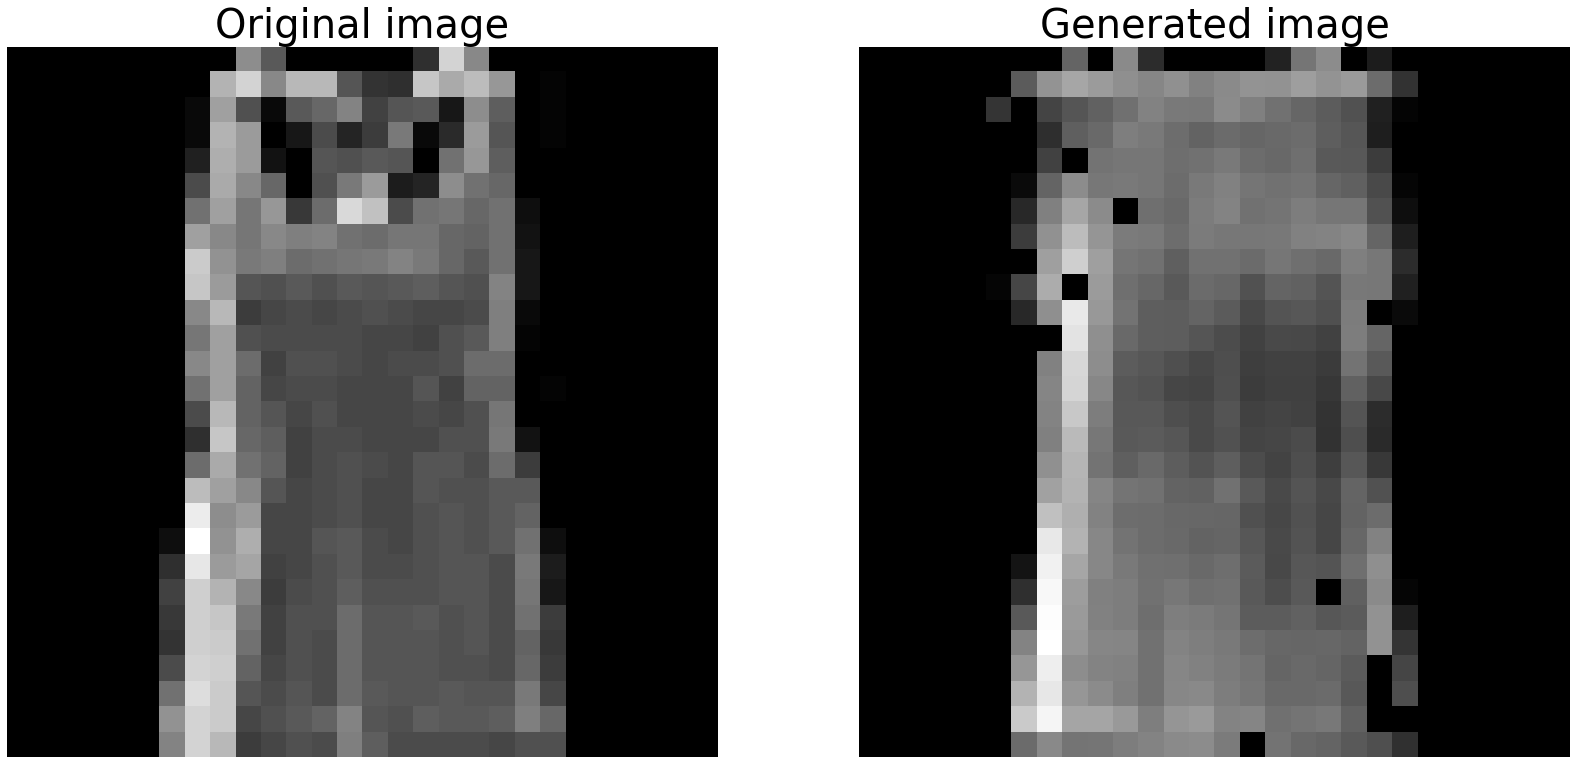

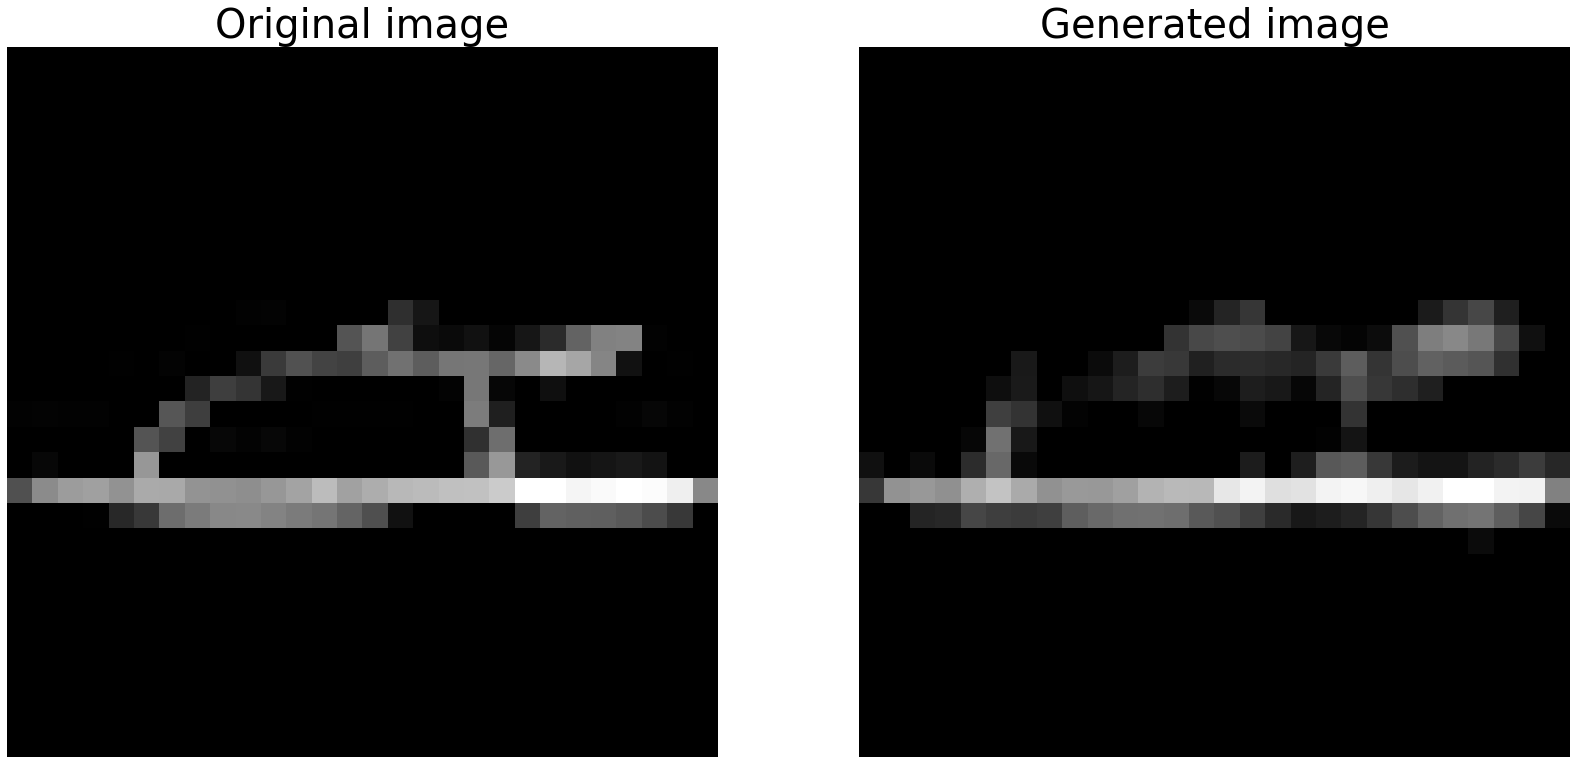

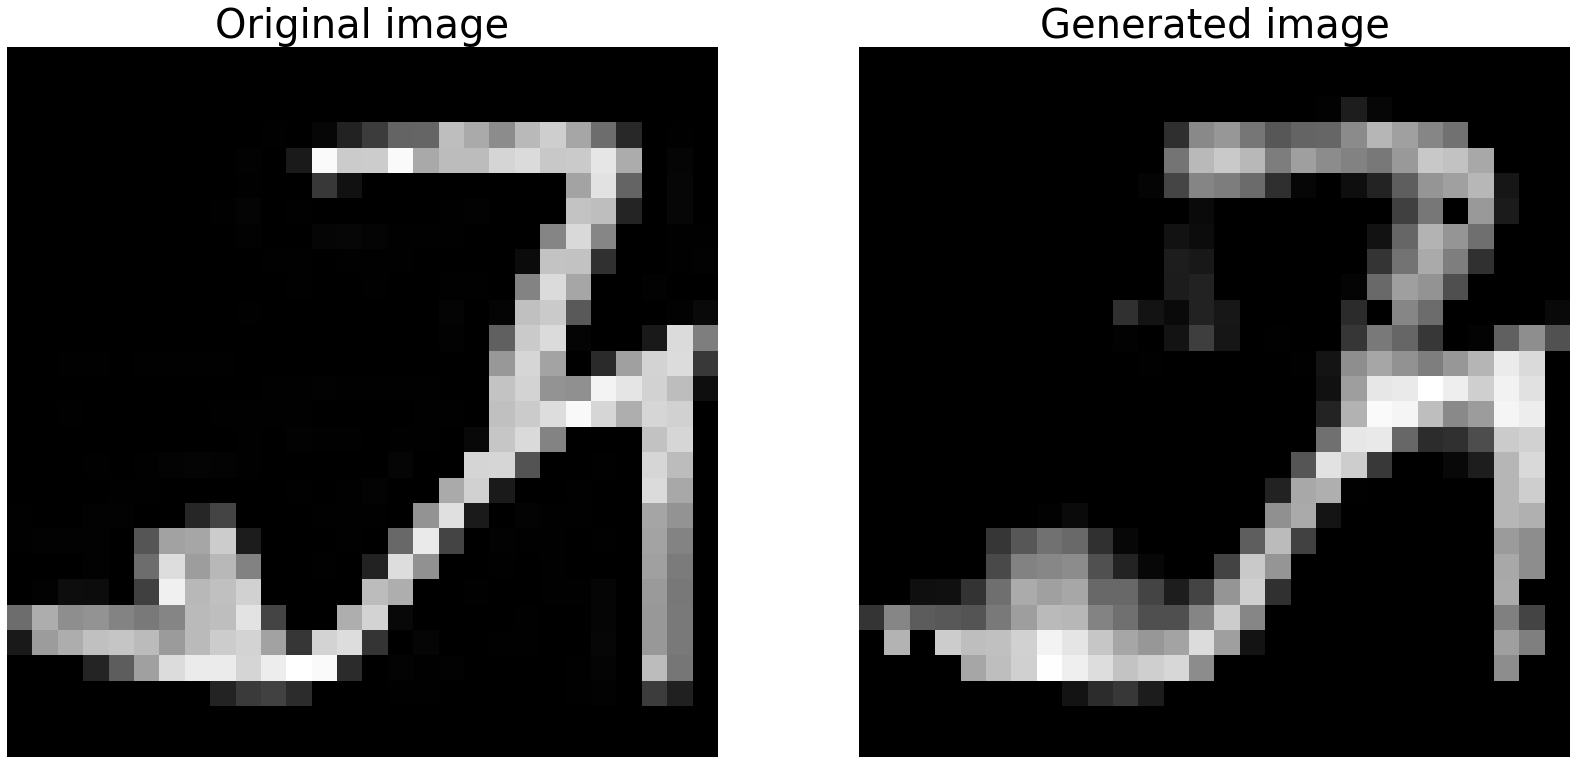

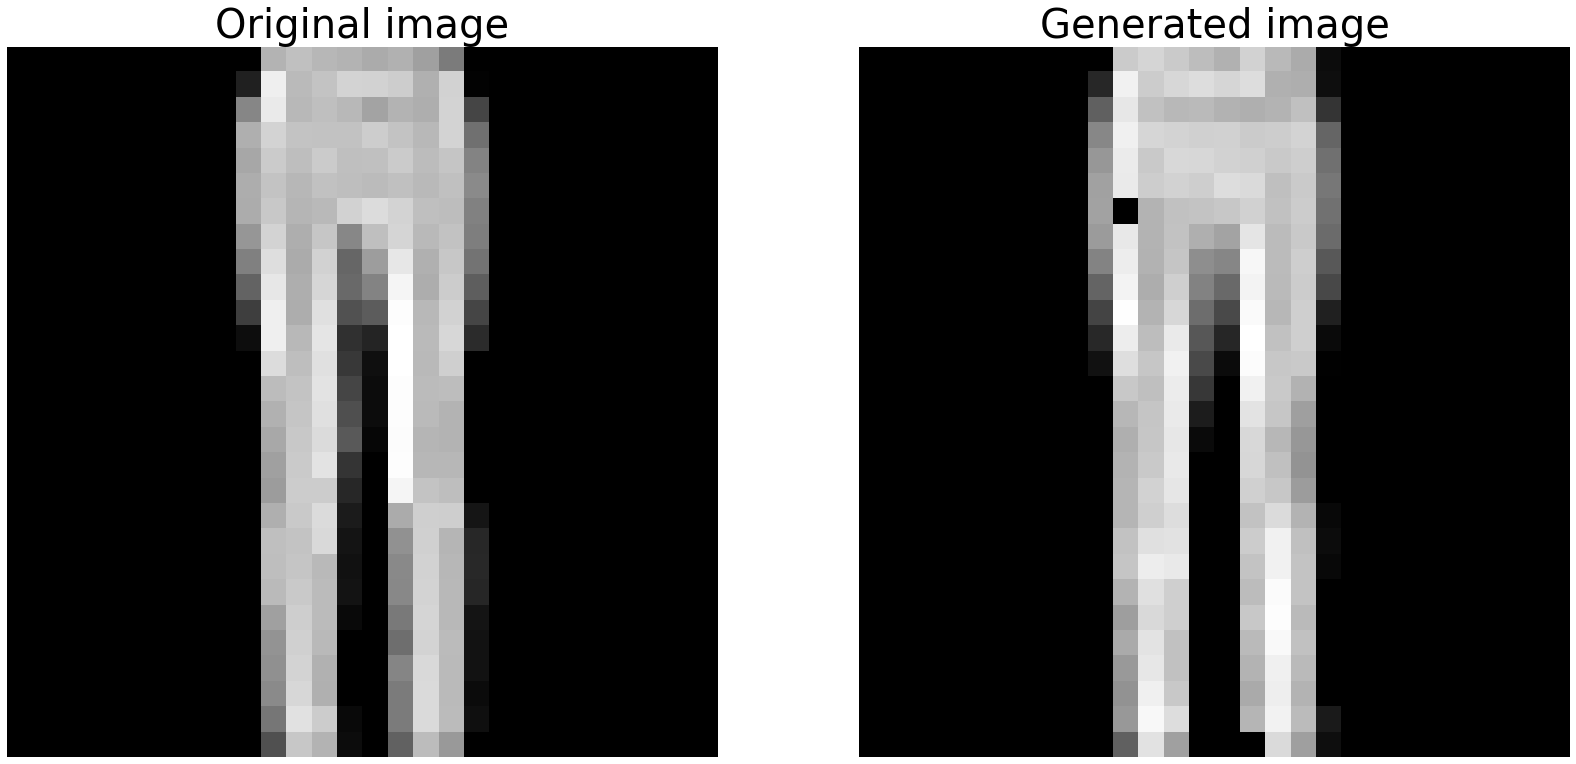

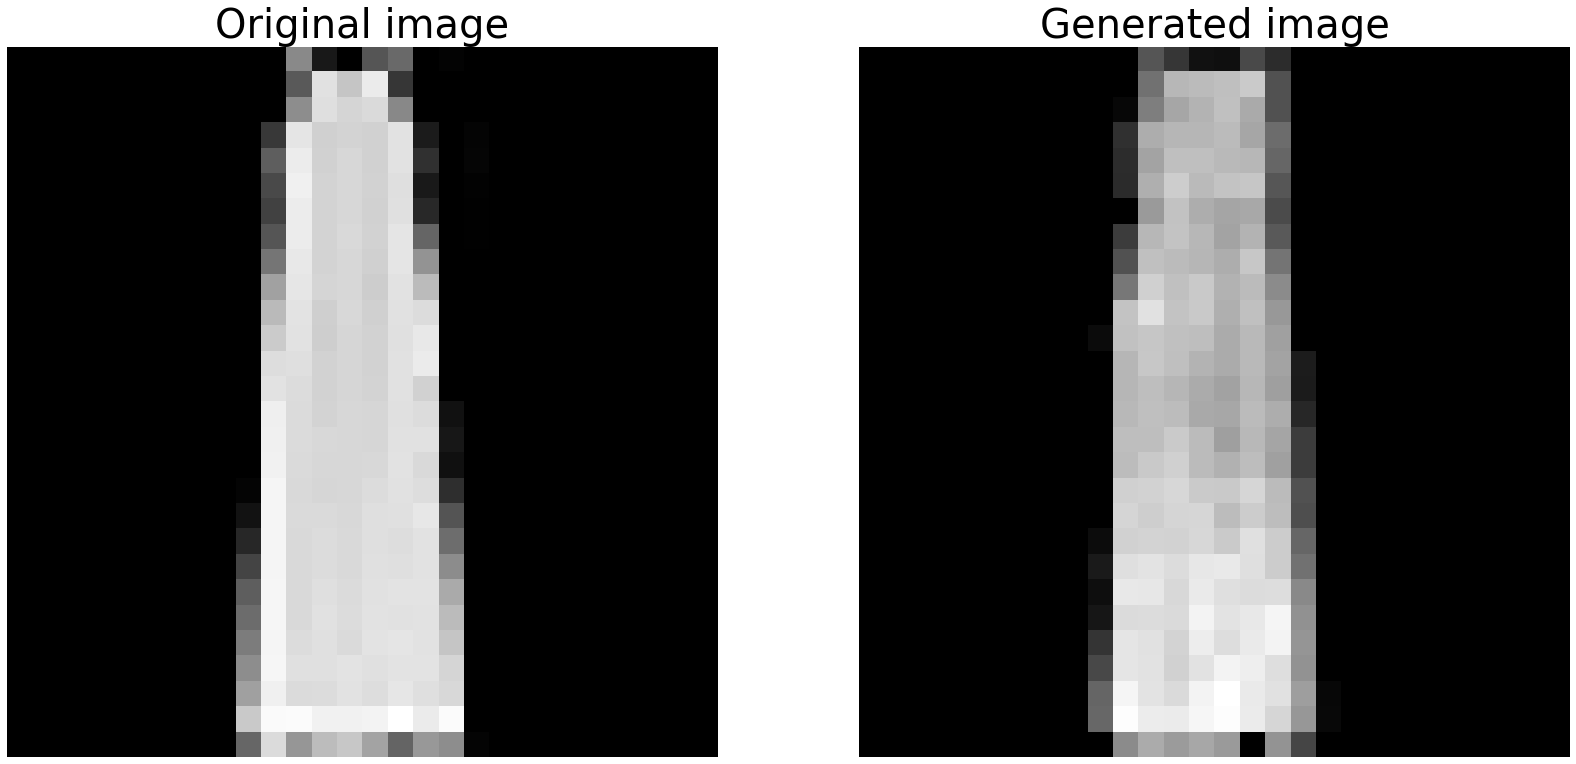

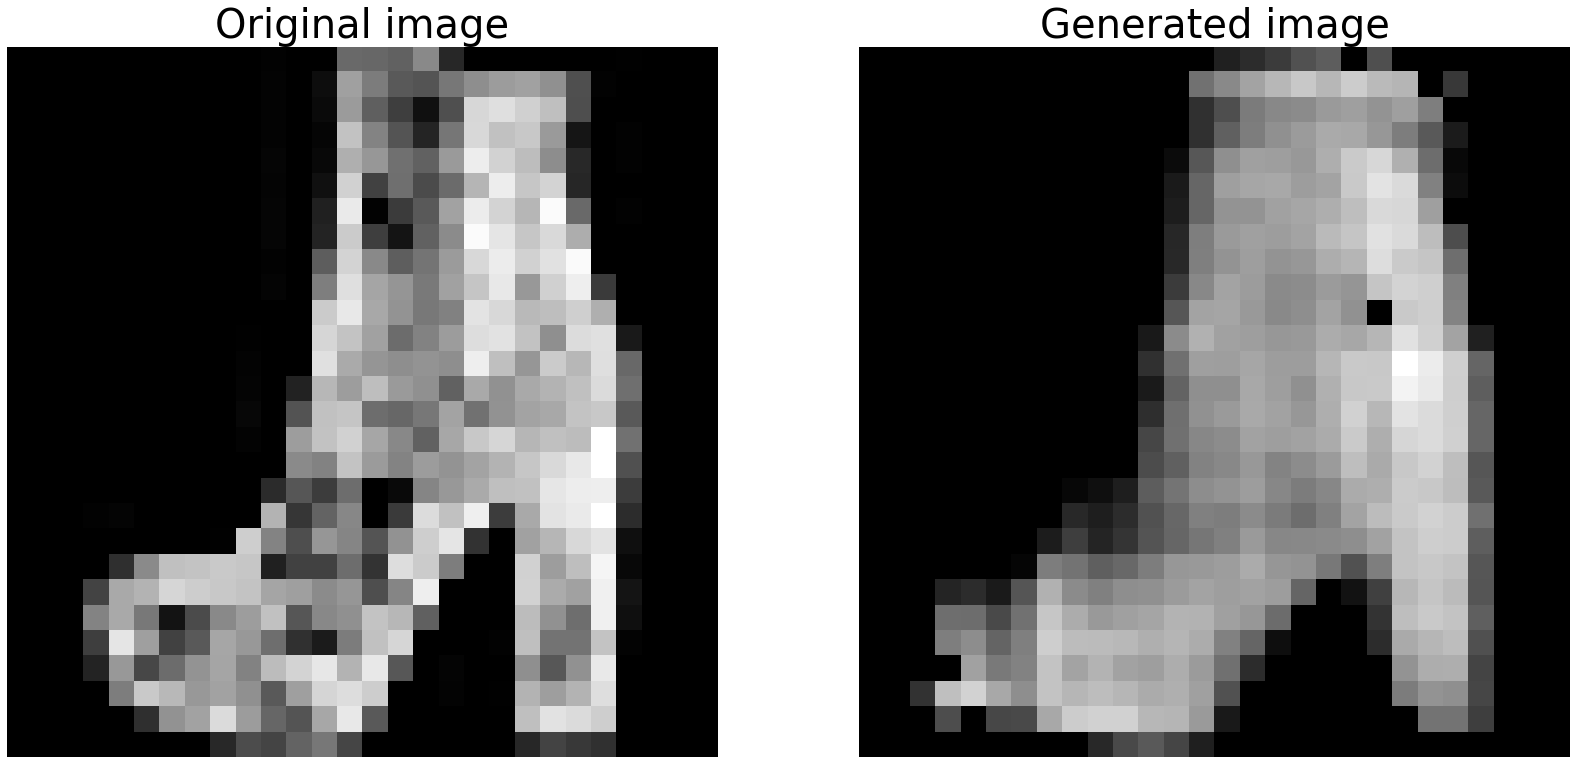

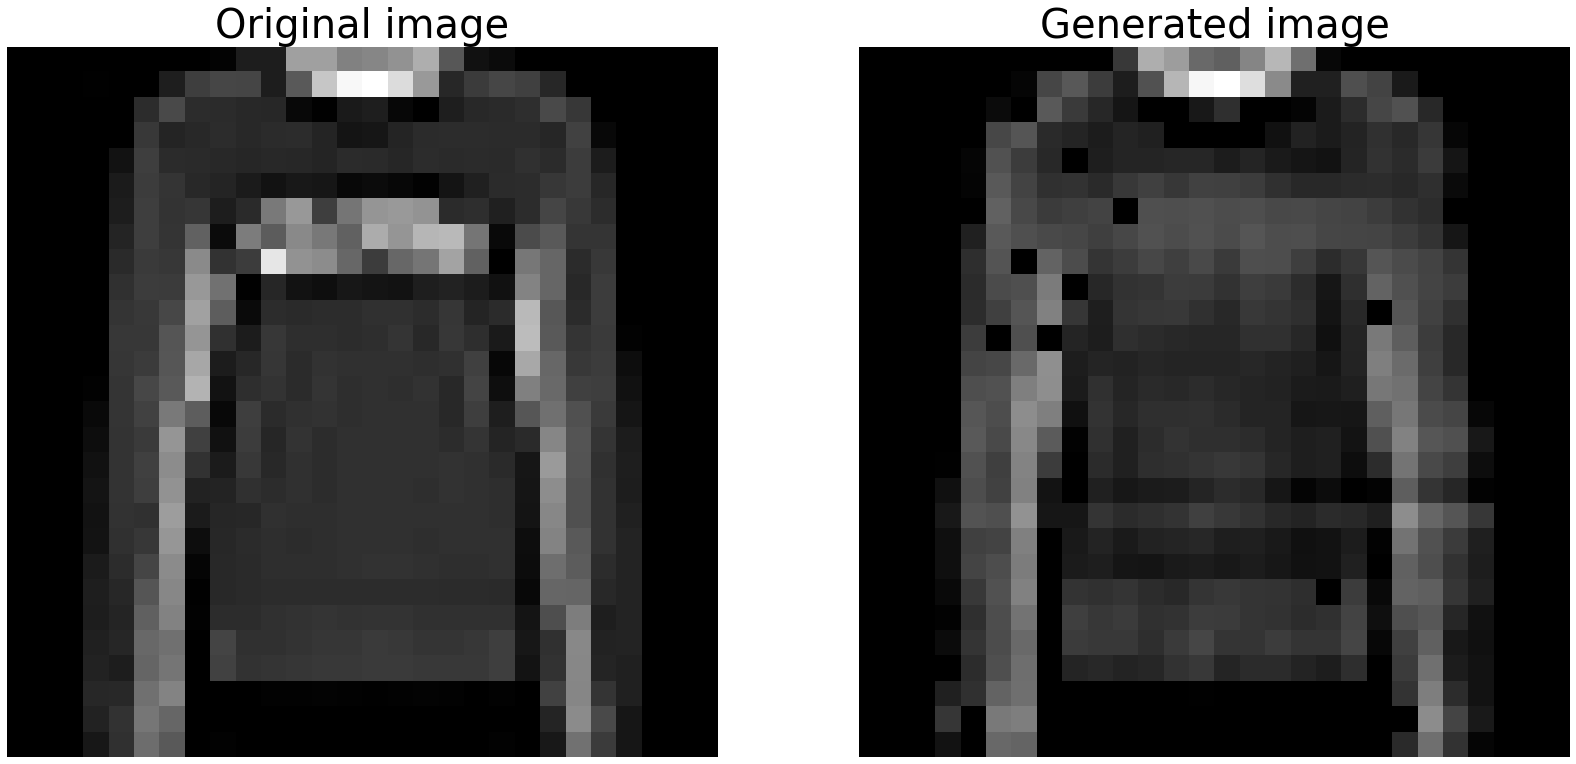

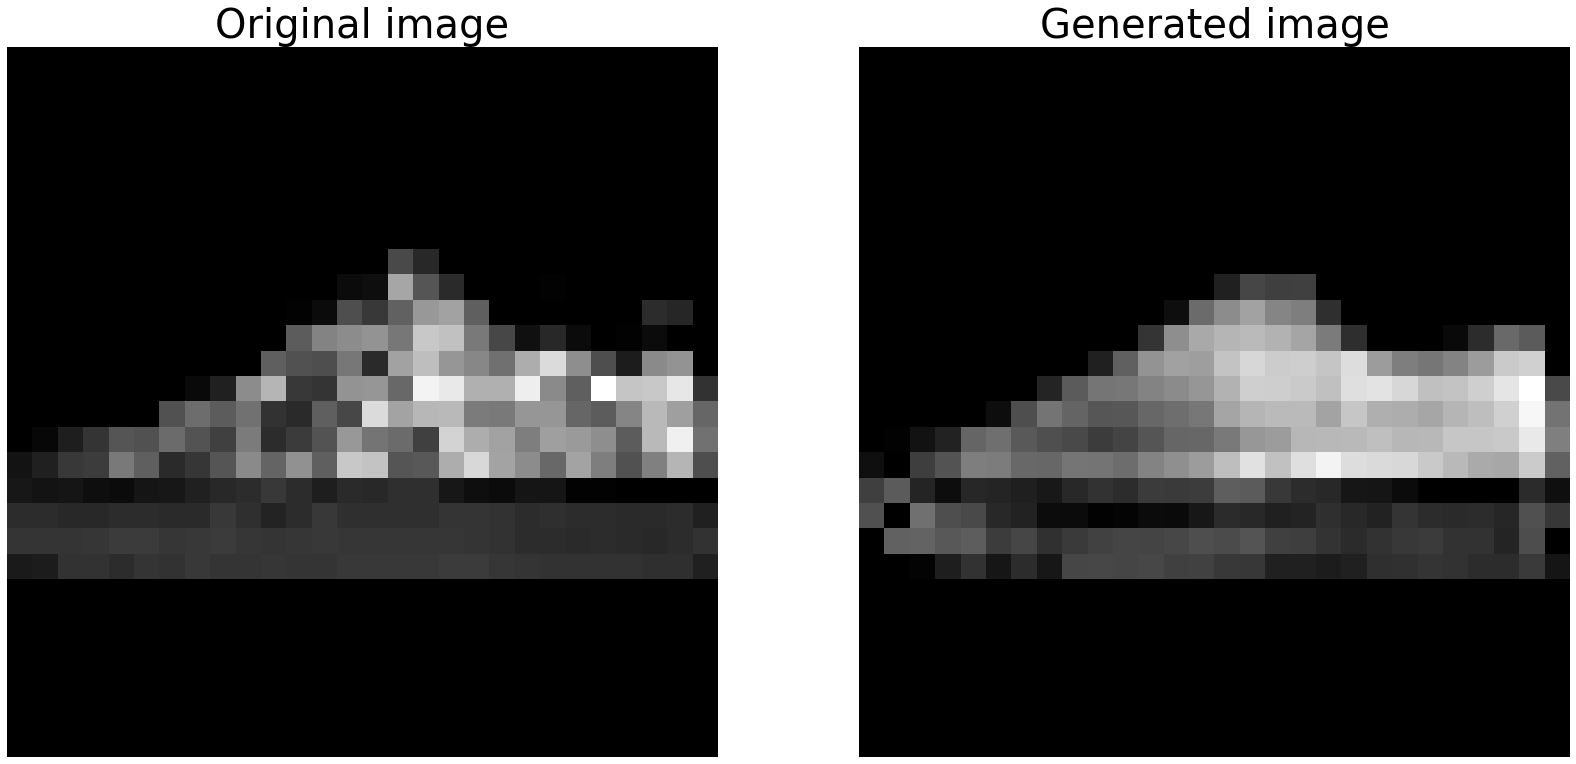

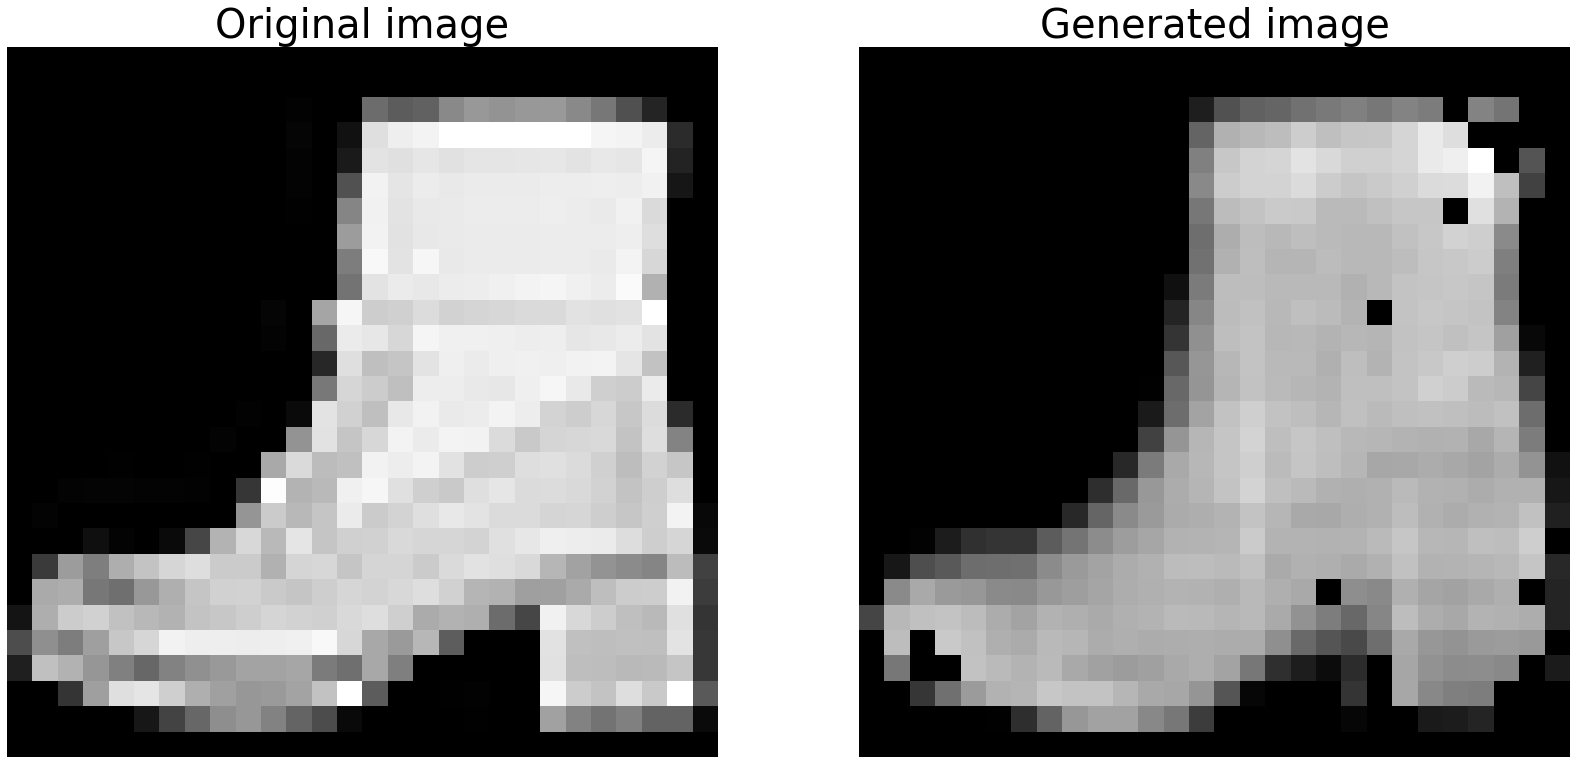

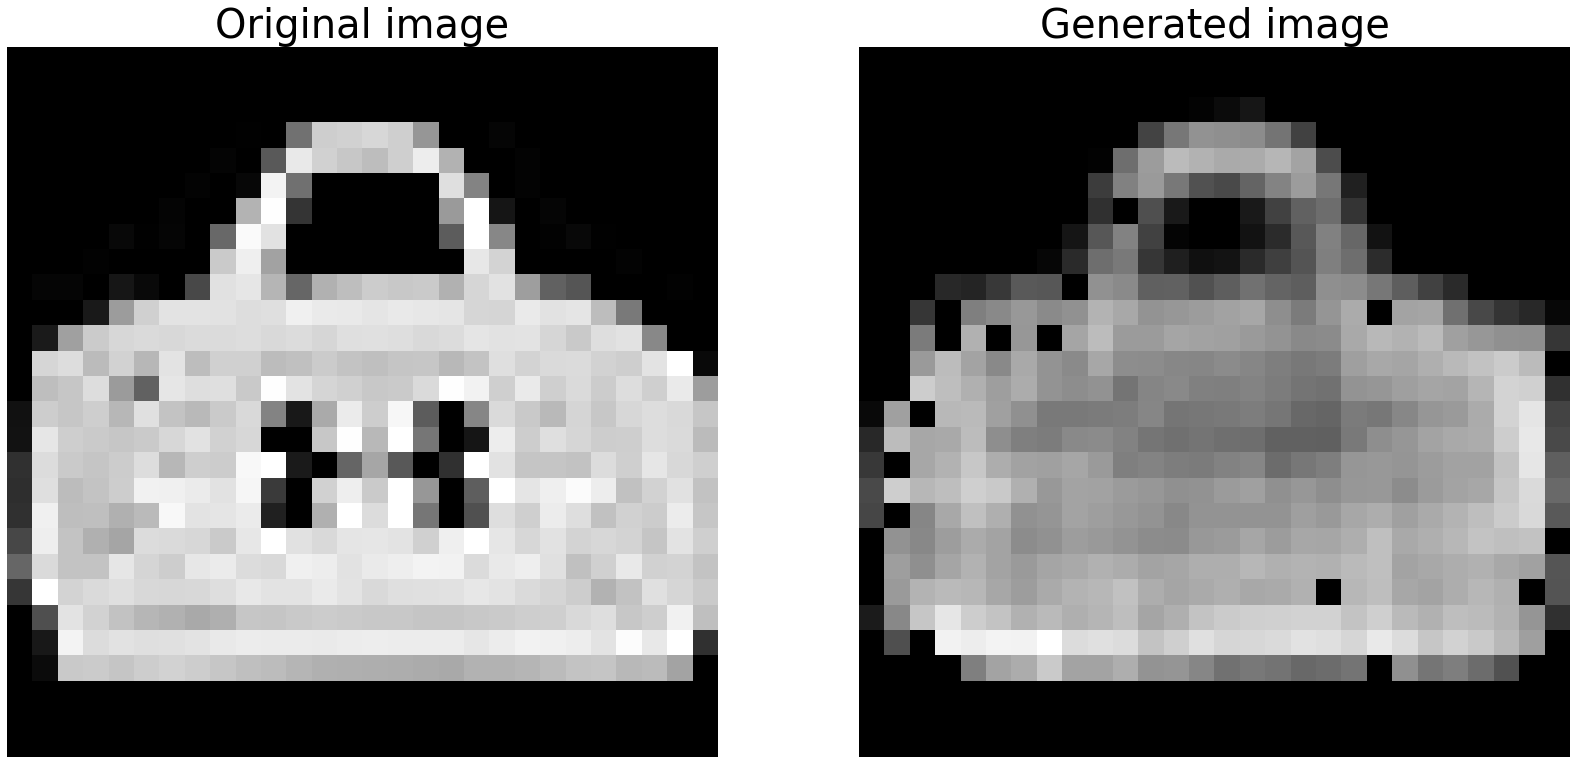

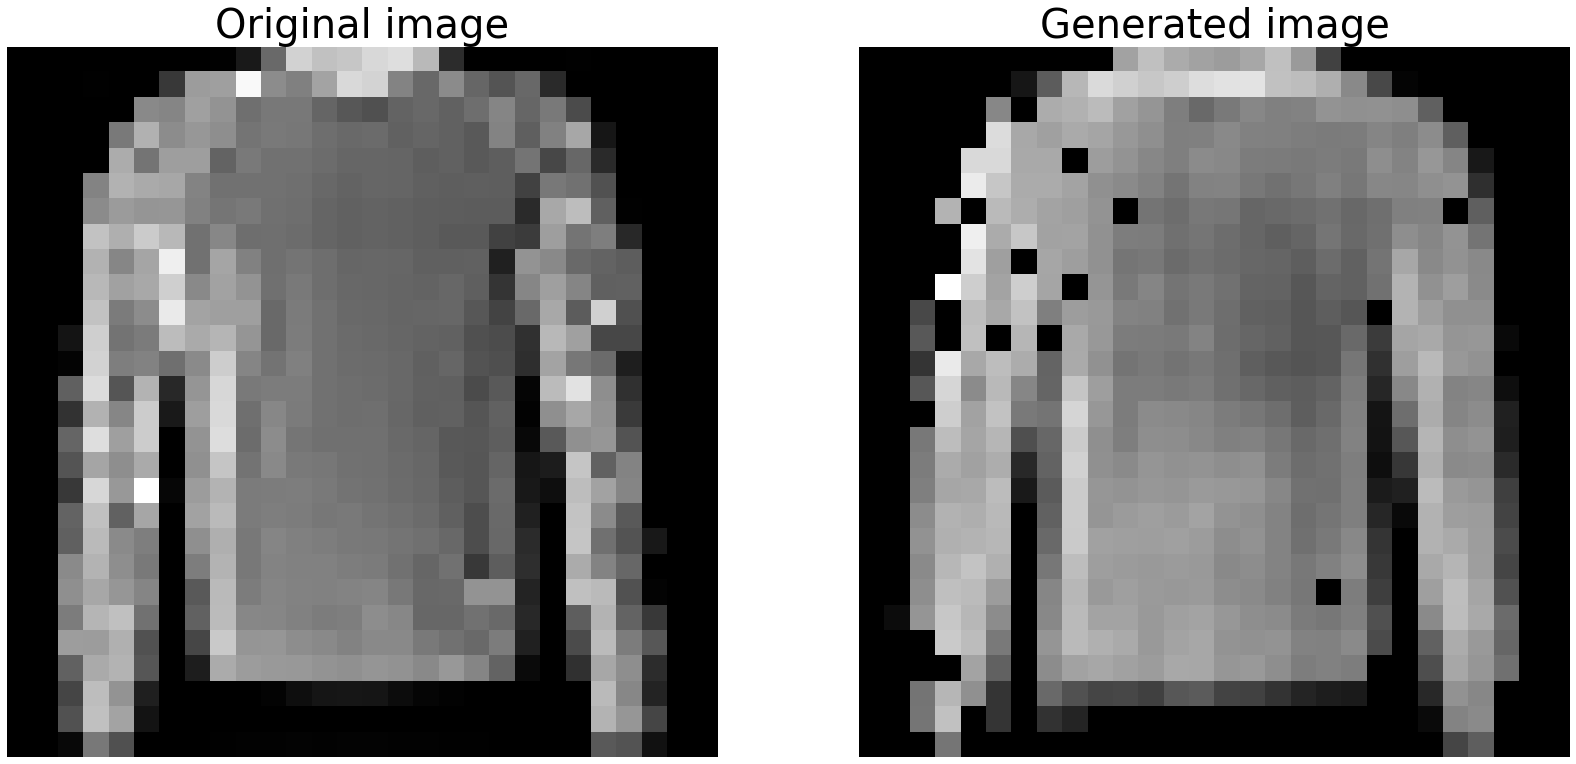

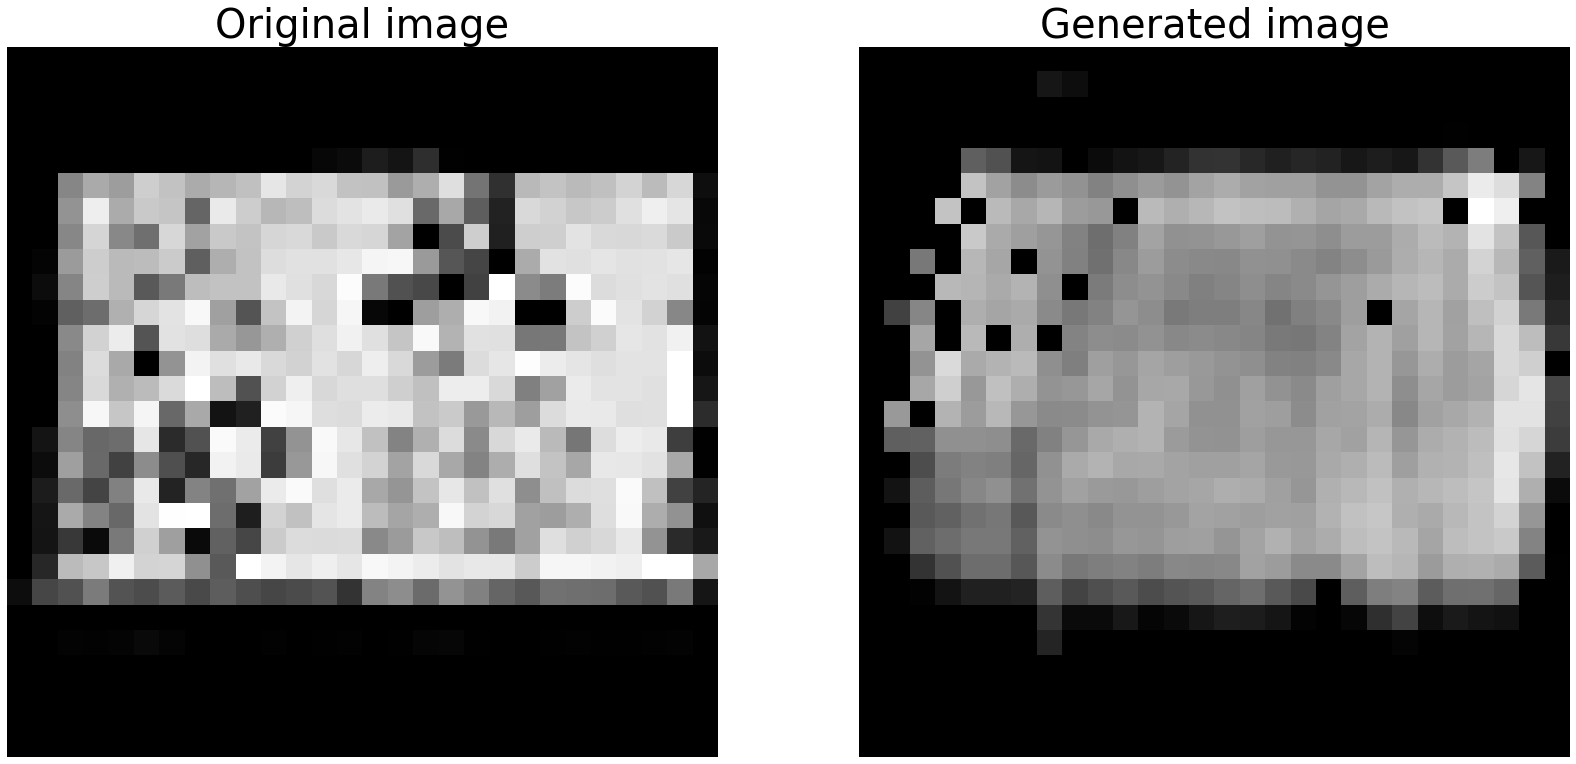

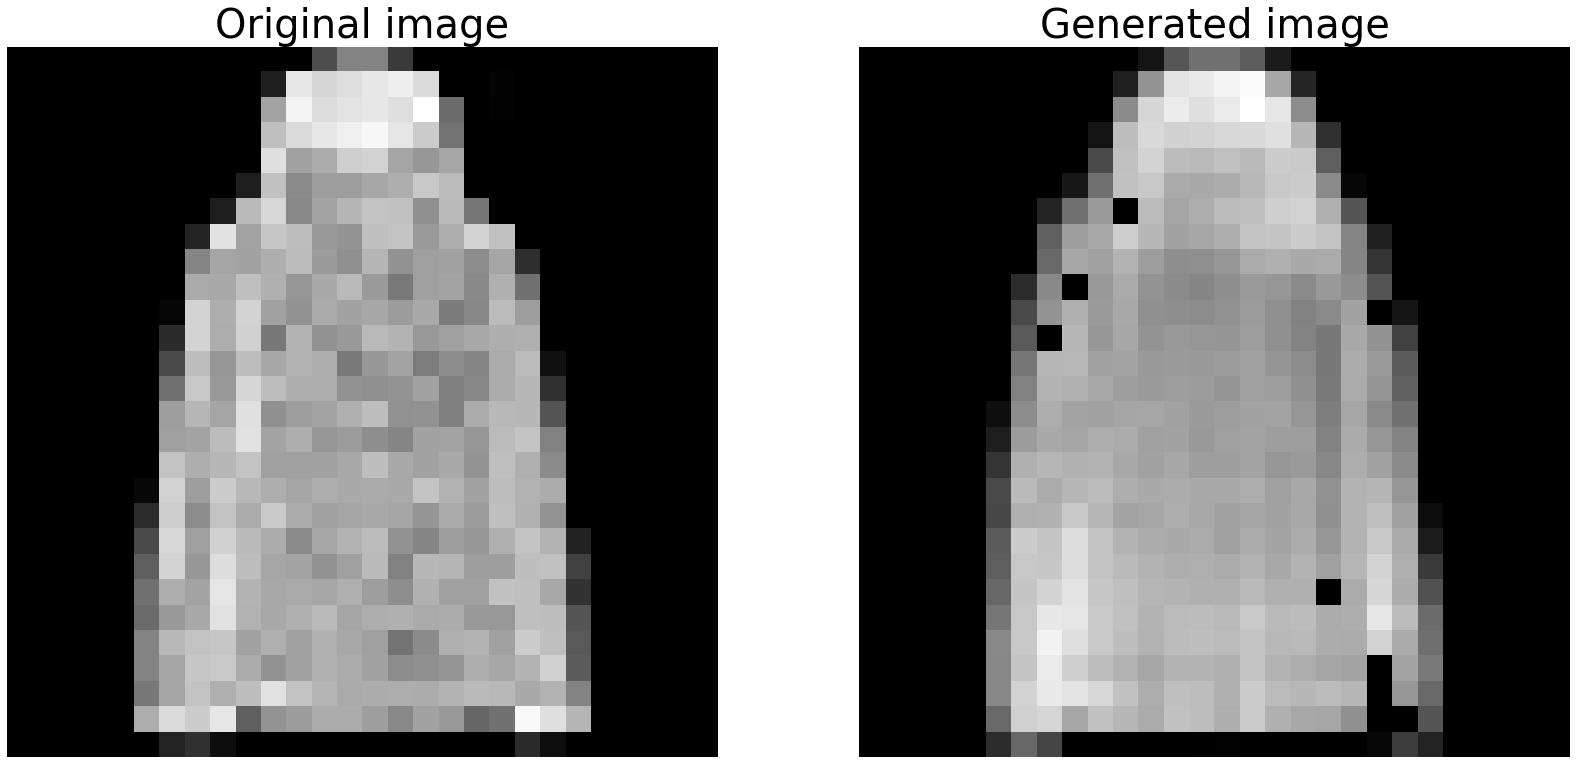

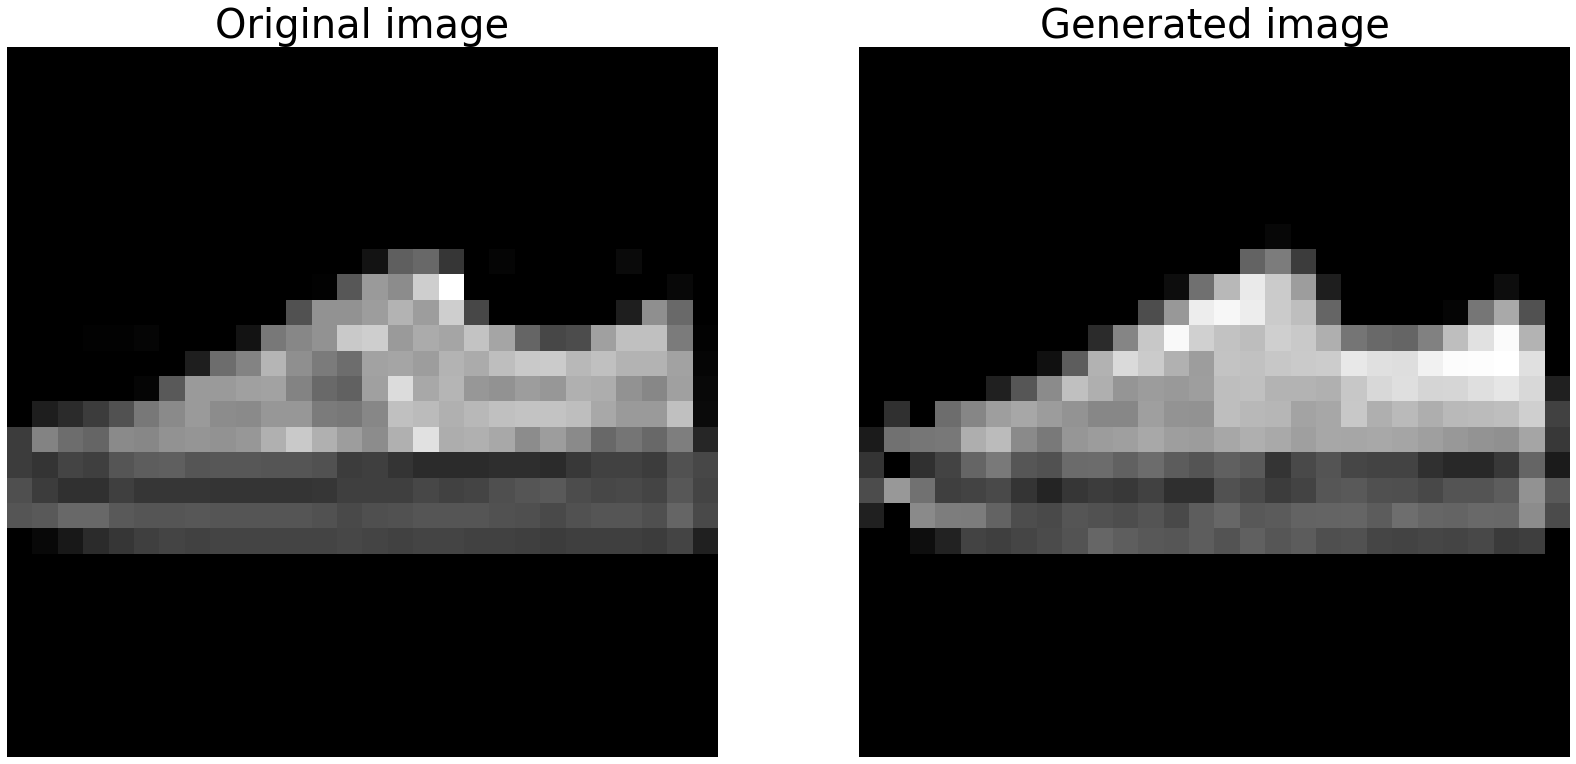

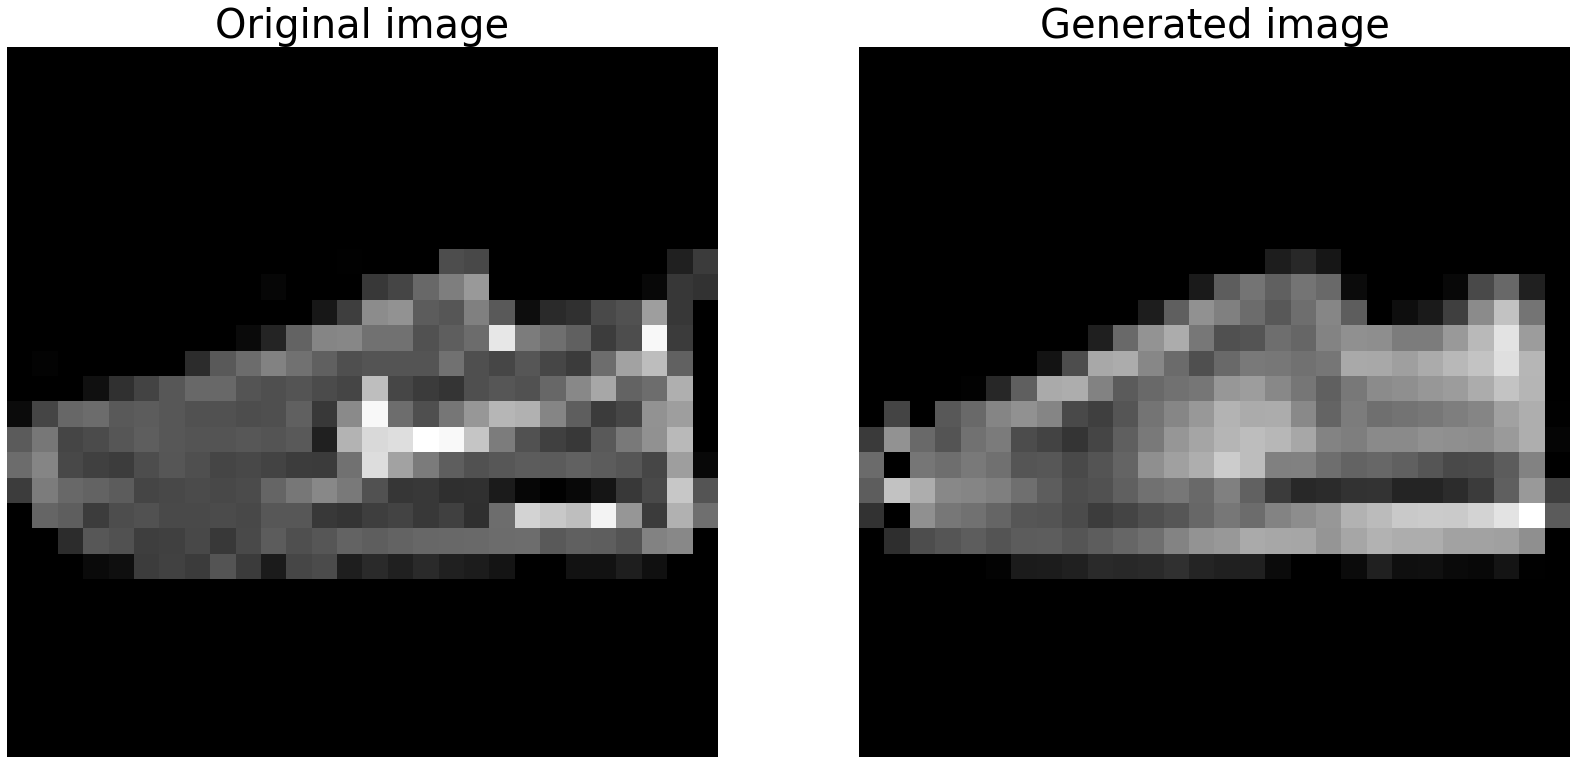

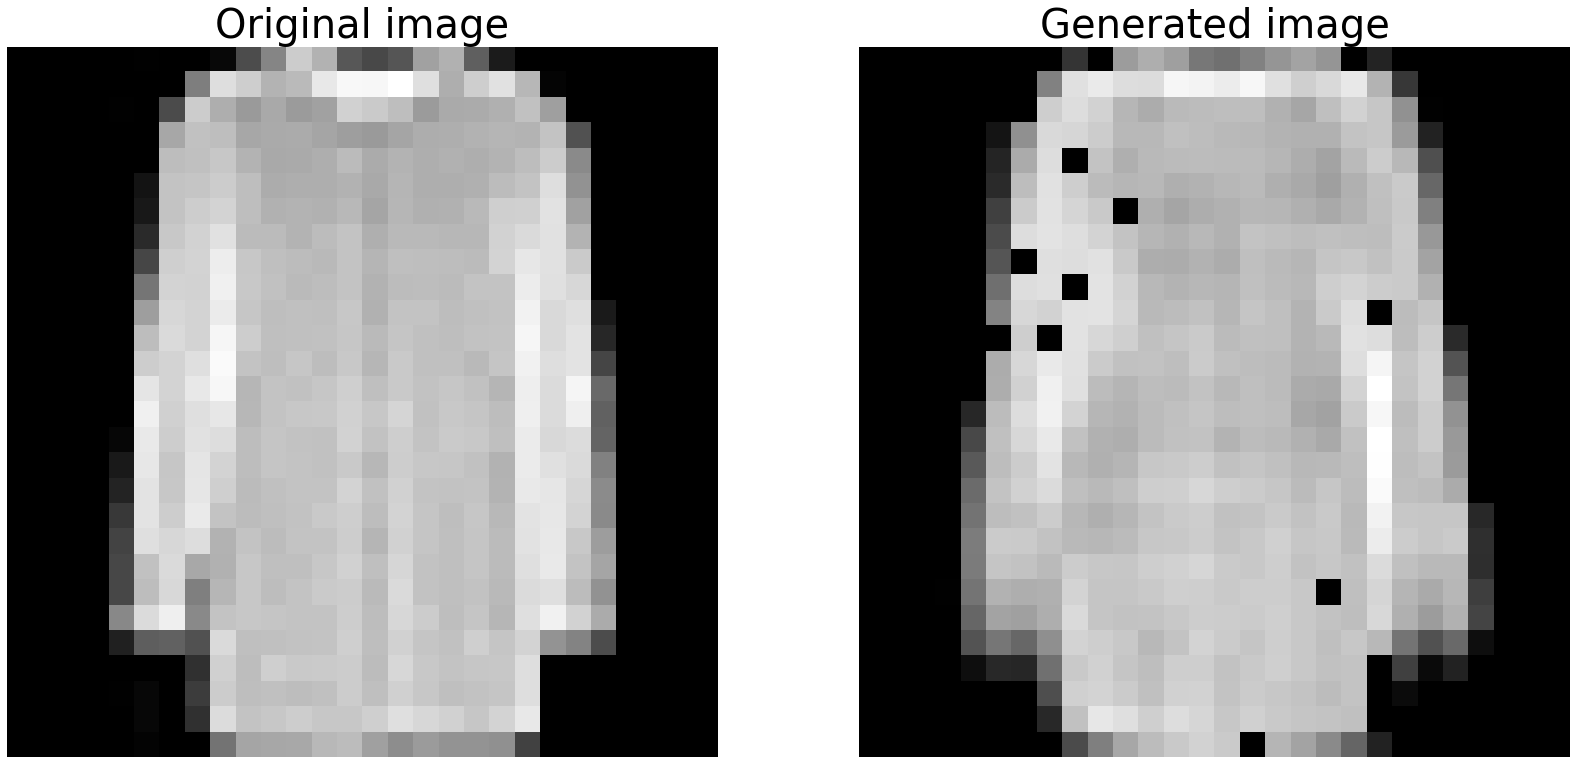

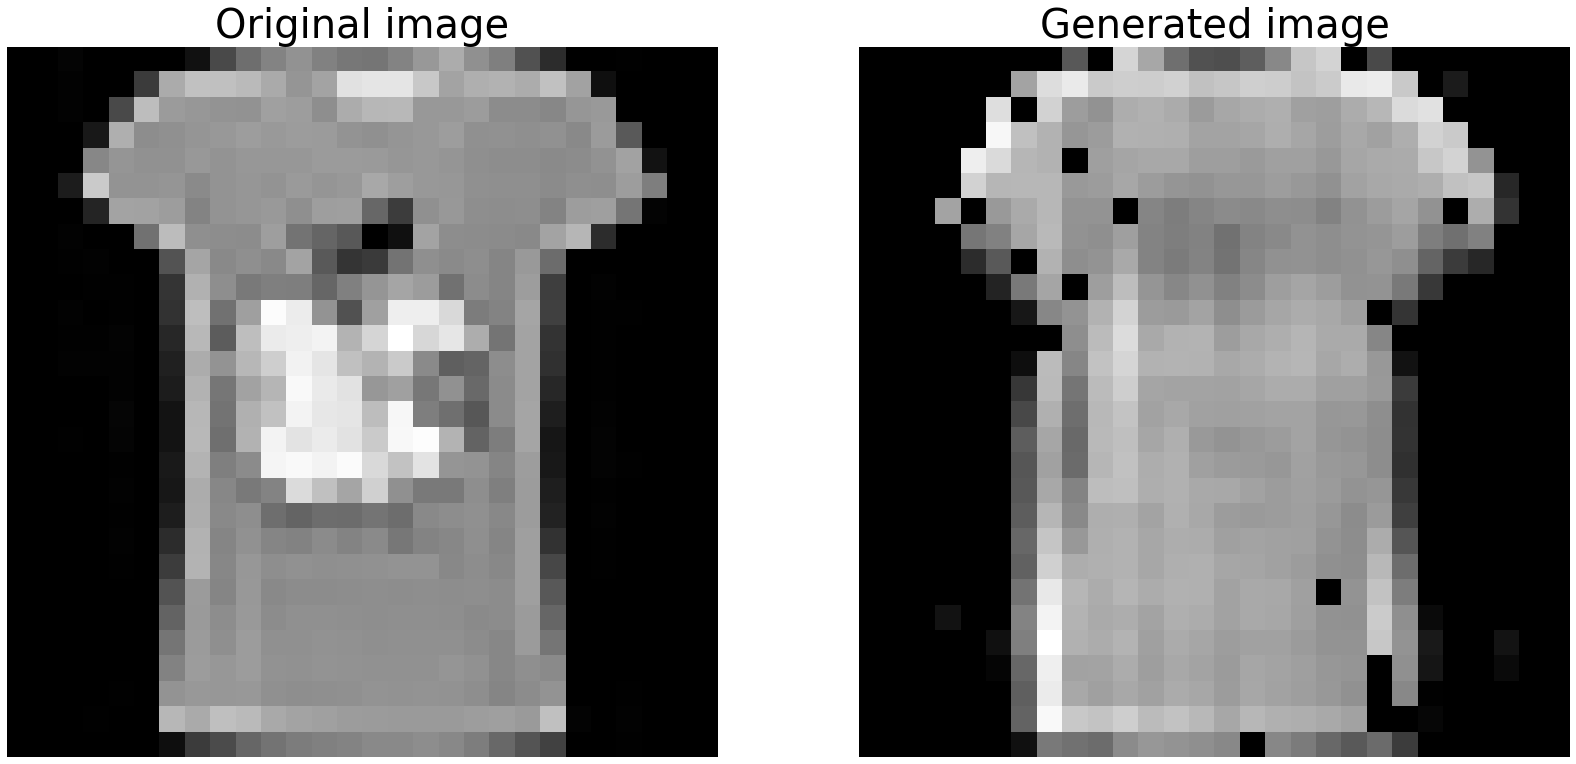

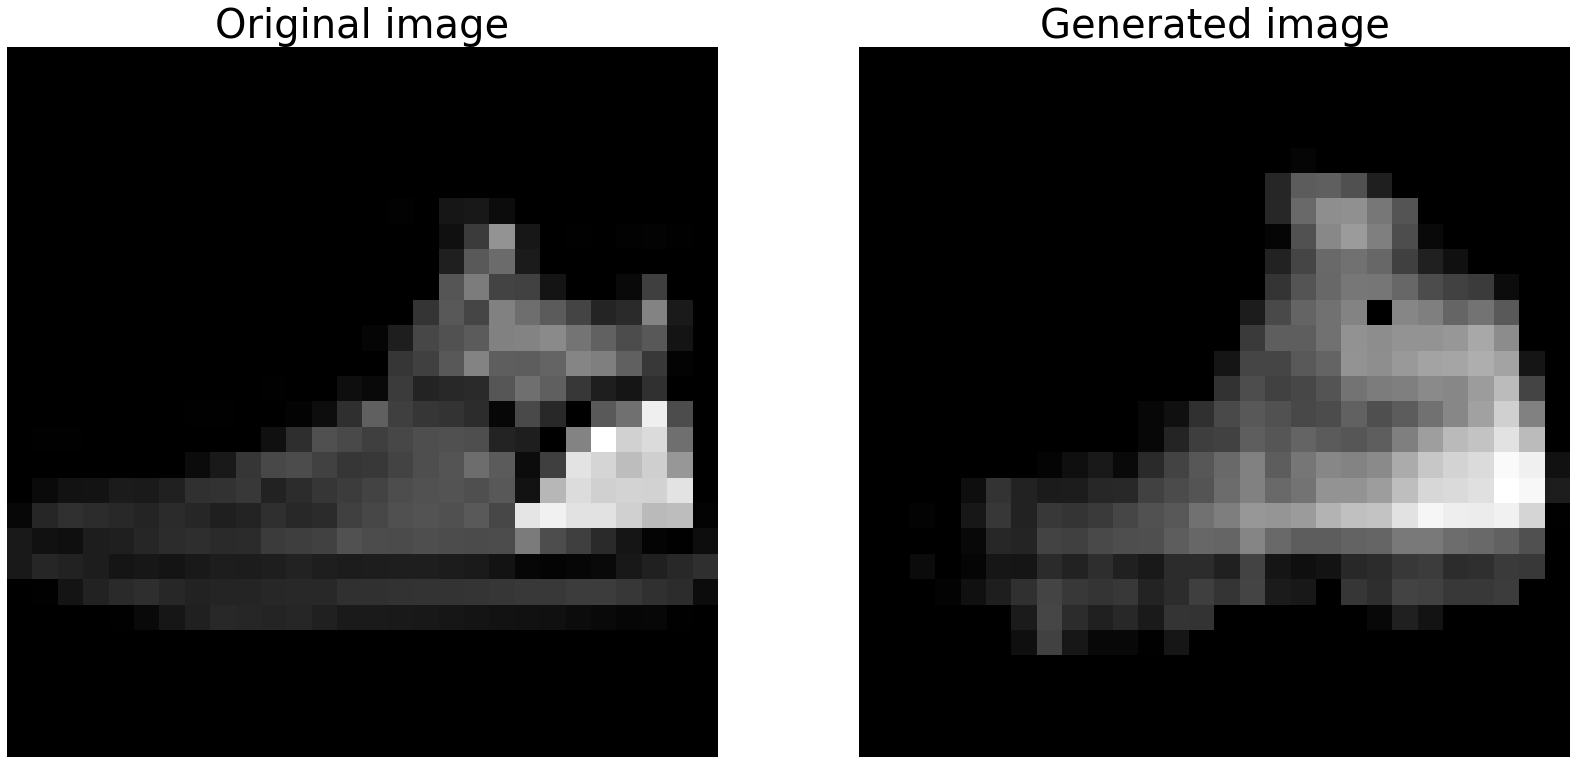

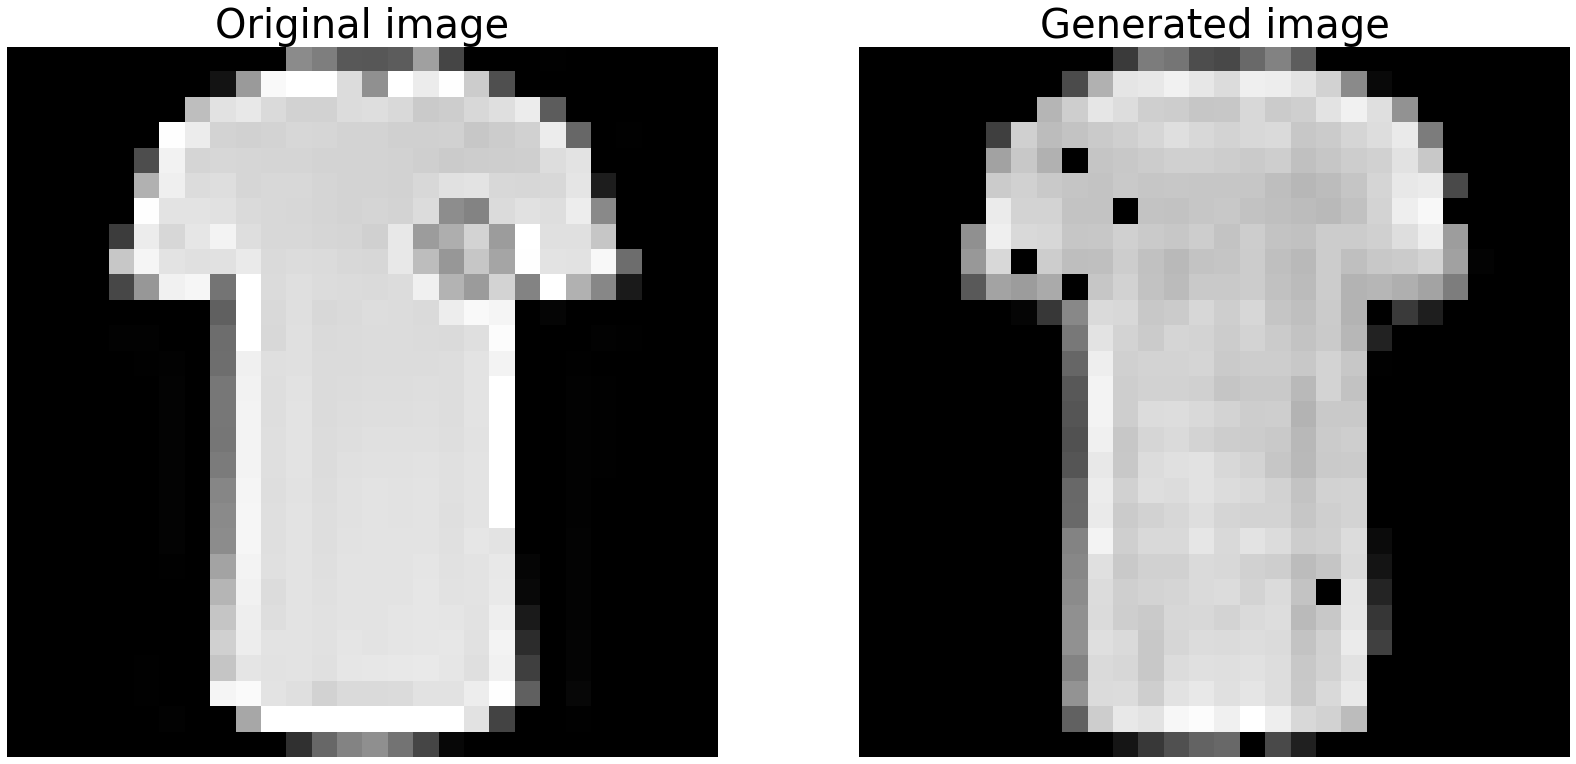

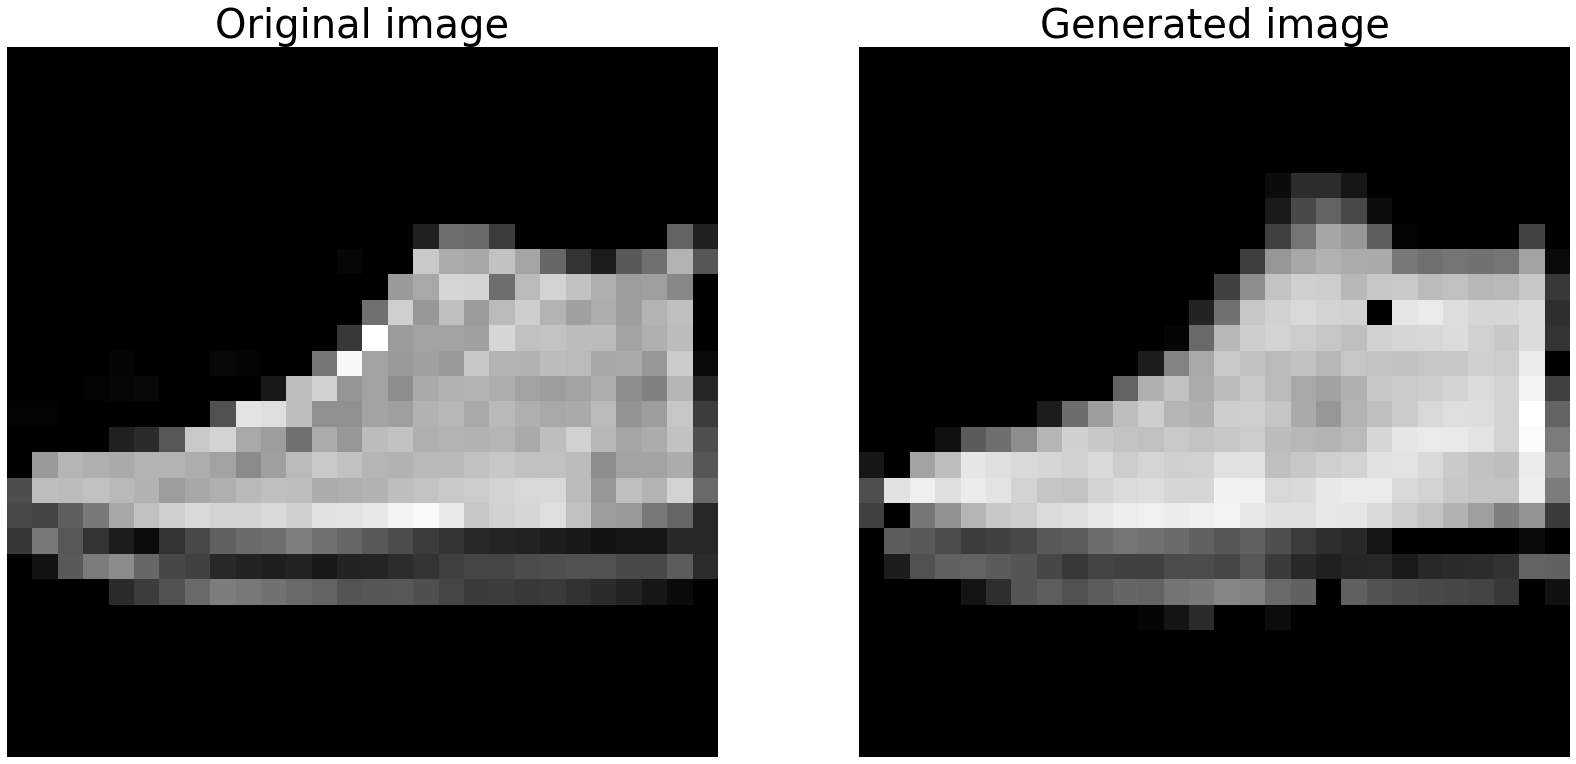

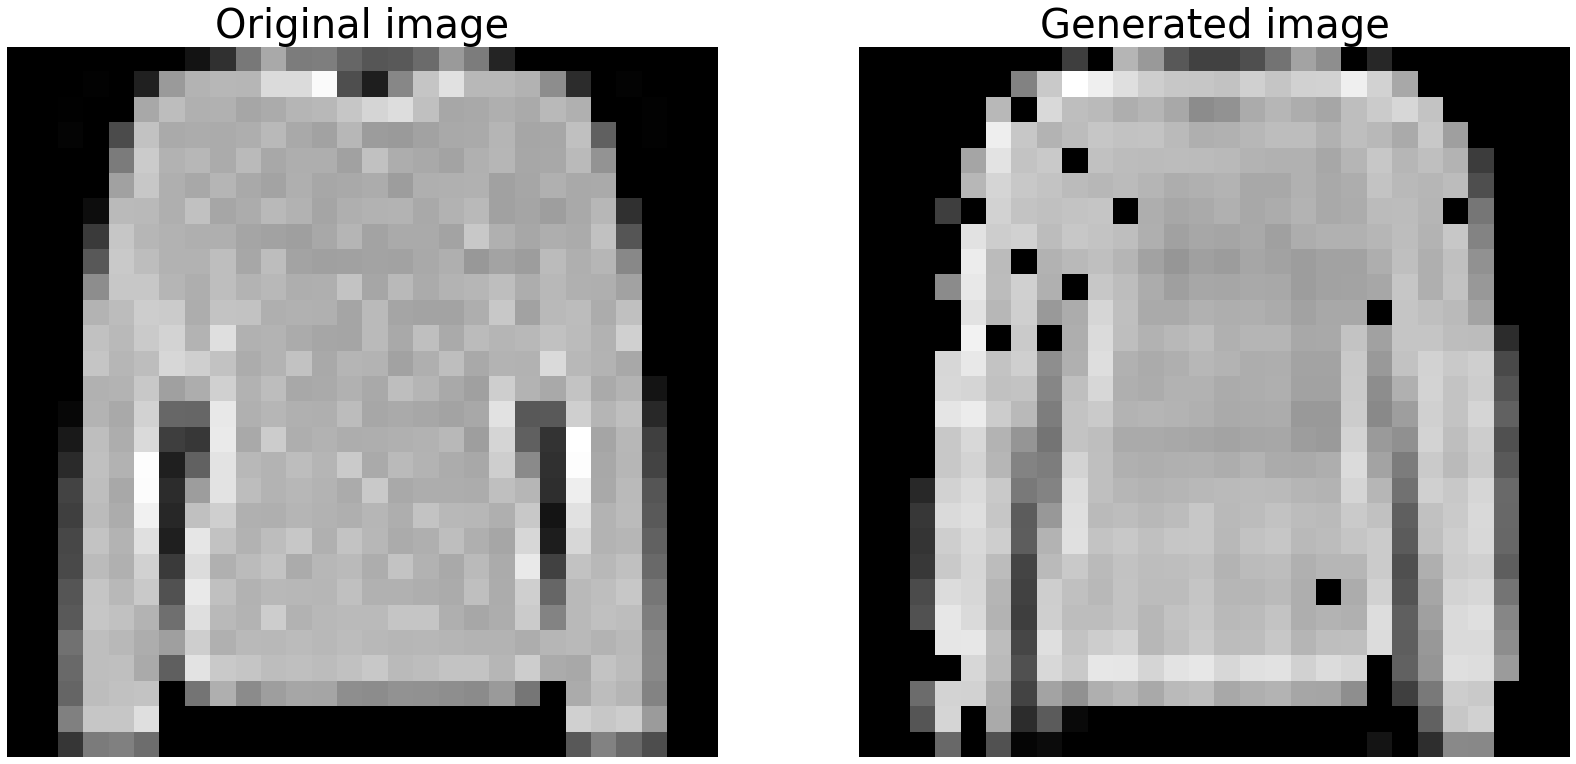

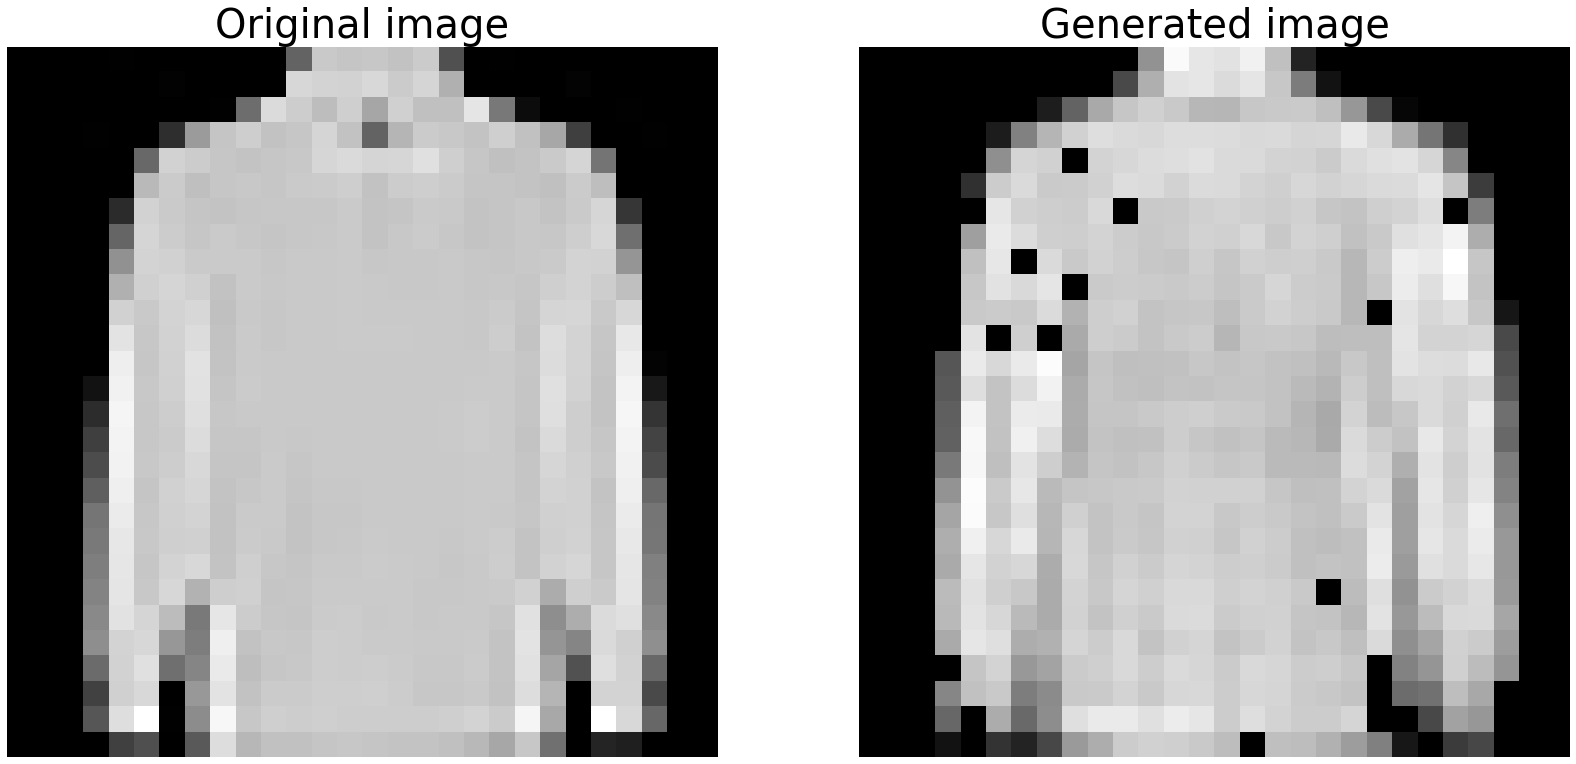

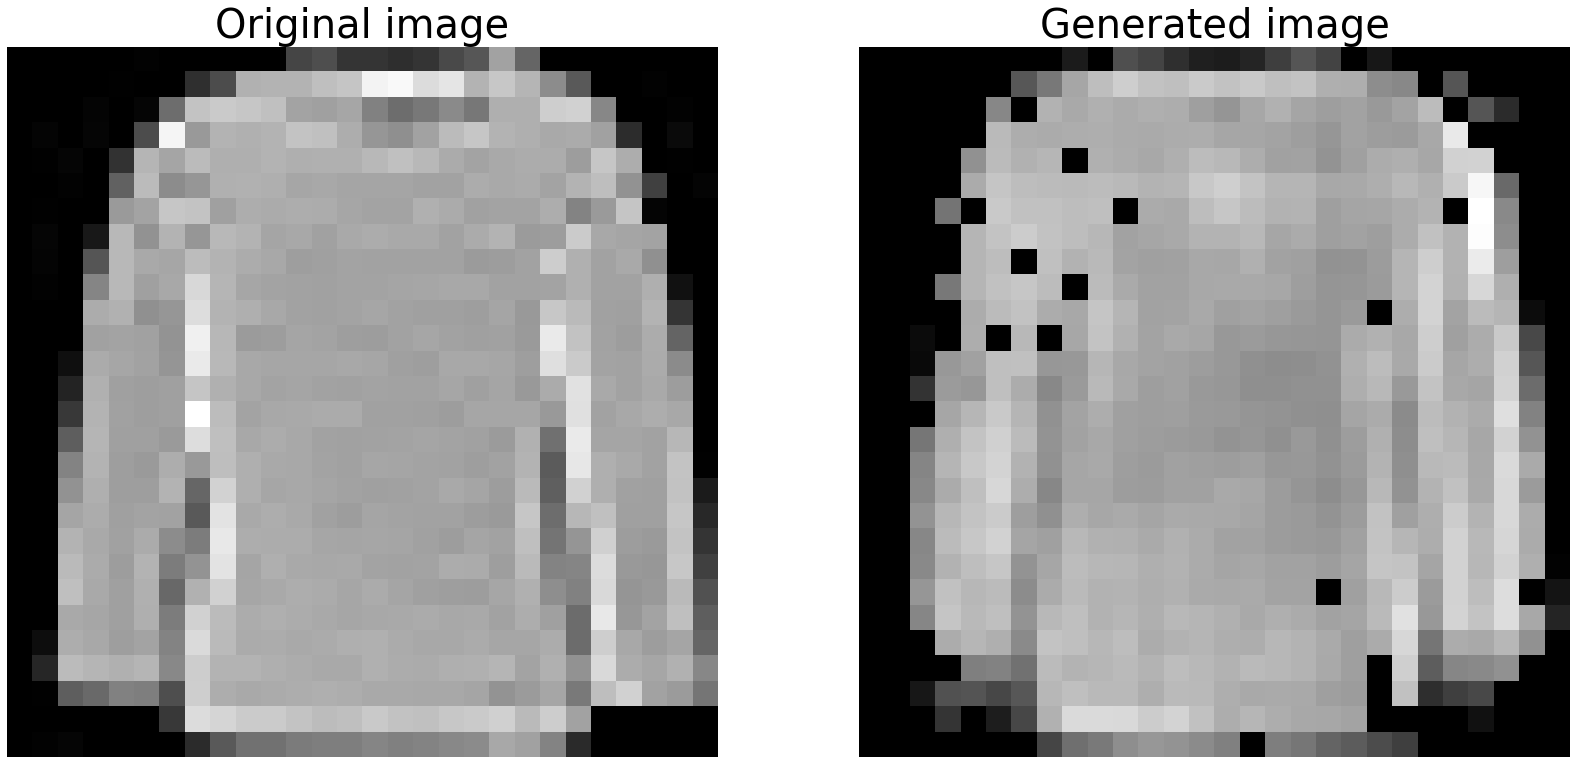

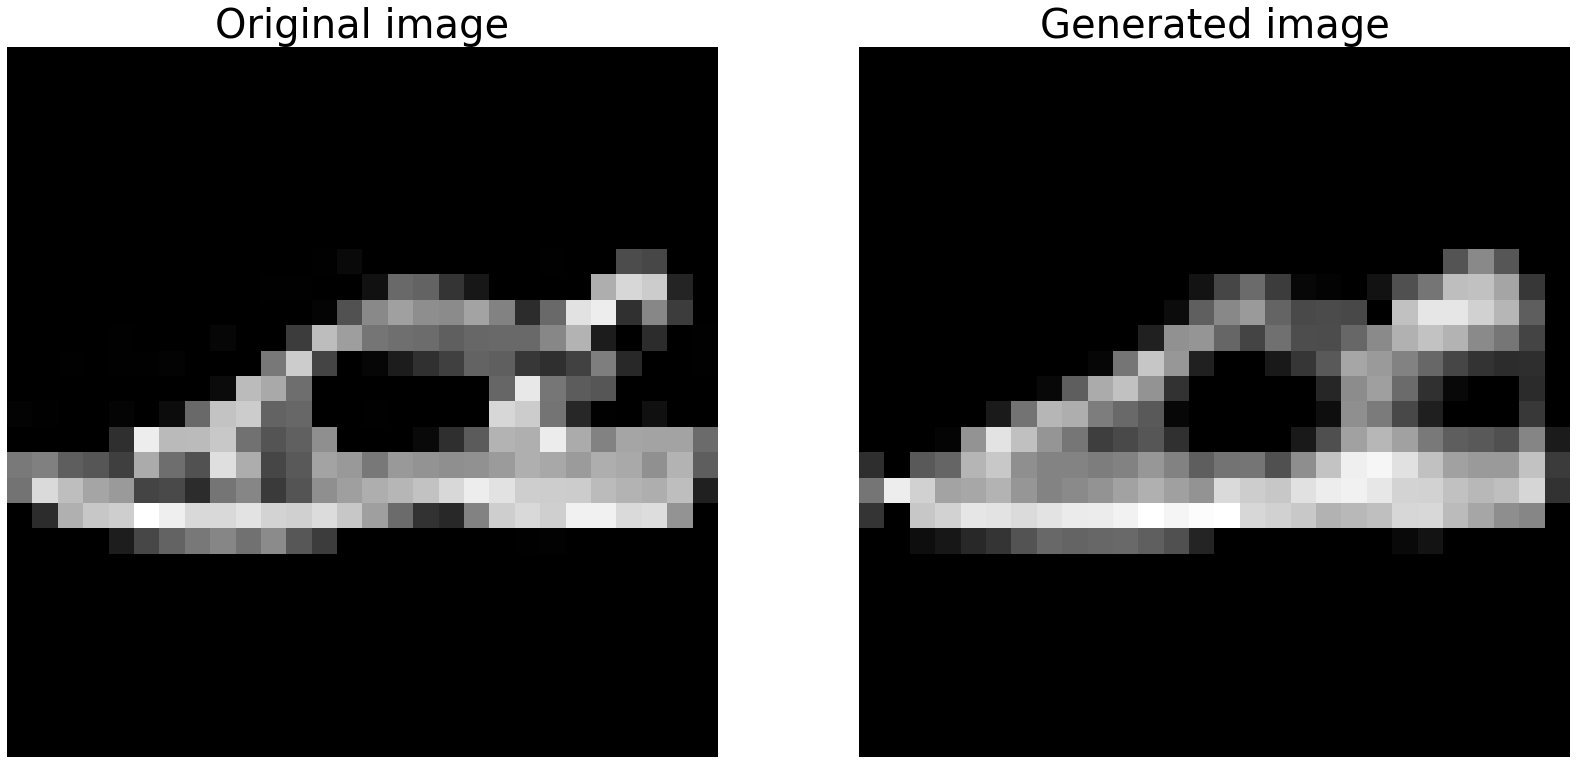

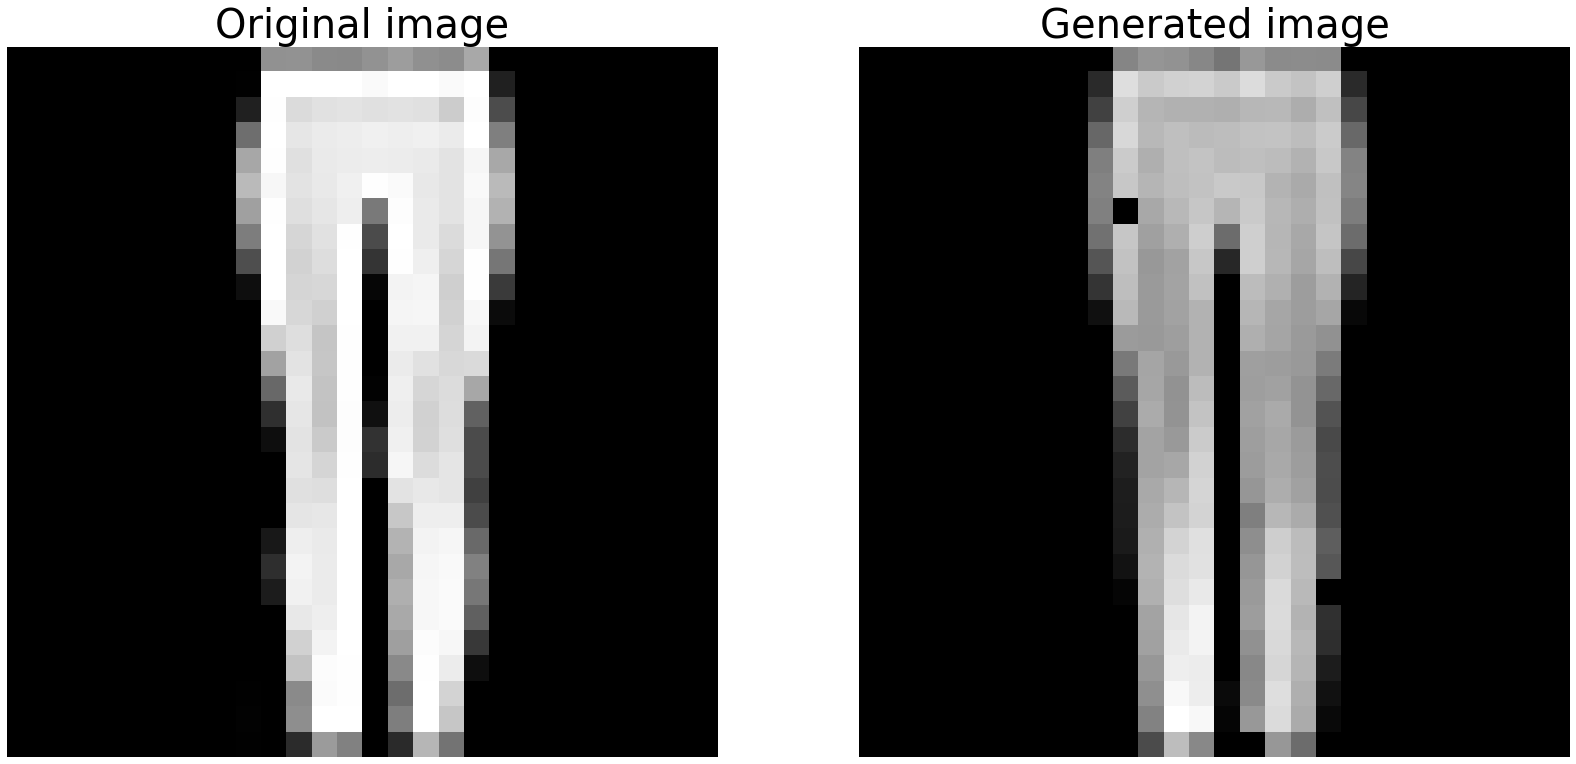

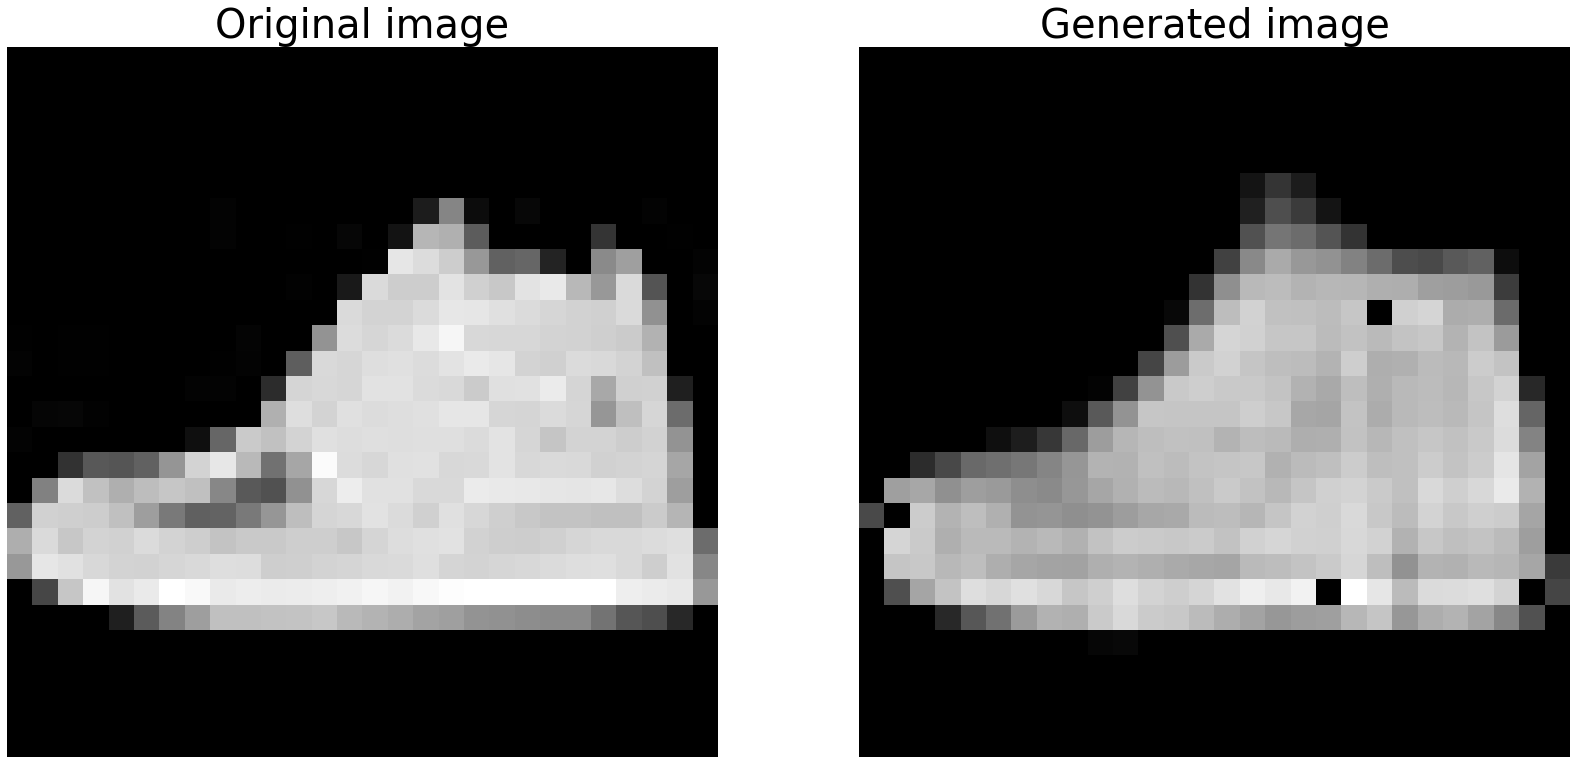

In [60]:
for i in range(50):
  testModel(xTest[random.randint(0, xTest.shape[0])])